<h1 style="font-size:2em">Projet 5 - Segmentez des clients d'un site e-commerce</h1>

# Objectifs

- **Olist:** Entreprise Brésilienne un service qui aide les commerçants/entreprises à vendre leurs produits sur diverses marketplaces en ligne (Amazon, Ebay...)  

**2 Objectifs:** 
- **Segmentation des clients:** Permettera de mieux appréhender les campagnes de communication
- **Proposition de contrat de maintenance:** Sera basée sur une analyse de la stabilité des segments au cours du temps
    - Cela signifie qu'il faut proposer une fréquence à laquelle la segmentation doit être mise à jour pour rester pertinente

**Base de données (Anonymisée):**
- Informations sur l’historique de commandes
- Produits achetés
- Commentaires de satisfaction
- Localisation des clients depuis janvier 2017

**Infos pertinantes à considérer:**
- Seuls 3 % des clients du fichier de données ont réalisé plusieurs commandes
- La segmentation doit pouvoir différencier les bons et moins bons clients en termes de commandes et de satisfaction
- Le code doit respecter **la convention PEP8**

## Convention PEP8 (Python Enhancement Proposal 8)

**Convention de codage pour le langage de programmation Python:**
- **Indentation:** Utiliser 4 espaces par niveau d'indentation. Les tabulations ne sont pas recommandées.
- **Longueur de ligne:** Chaque ligne de code ne doit pas dépasser 79 caractères.
- **Espaces blancs:** Éviter les espaces blancs inutiles à la fin des lignes ou sur les lignes vides.
- **Importations:** Les modules doivent être importés sur des lignes séparées et ils doivent être placés en haut du fichier.
- **Commentaires:** Ils doivent être complets et compréhensibles. Ils doivent être insérés sur une nouvelle ligne si possible.
- **Nommage des variables:** Les noms des variables doivent être descriptifs, en minuscules, avec des mots séparés par des underscores si nécessaire.

In [1]:
# Importations: Les modules doivent être importés sur des lignes séparées 
# et ils doivent être placés en haut du fichier.
import os
import sys

def process_data(data):  
    """
    Commentaires: Ils doivent être complets et compréhensibles. 
    Ils doivent être insérés sur une nouvelle ligne si possible. 
    Cette fonction traite les données passées en argument.
    """
    # Indentation: Utiliser 4 espaces par niveau d'indentation. 
    # Les tabulations ne sont pas recommandées.
    for item in data:  
        # Nommage des variables: Les noms des variables doivent être descriptifs, 
        # en minuscules, avec des mots séparés par des underscores si nécessaire.
        # Longueur de ligne: Chaque ligne de code ne doit pas dépasser 79 caractères.
        processed_item = item * 2  
        print(processed_item)

## Notebooks

- **Notebook1:** Analyse exploratoire
    - Cleaning
    - Feature engineering
    - Exploration
- **Notebook2:** Essais des différentes approches de modélisation (segmentation)
    - Plusieurs modèles de segmentation à considérer
    - Recherche des bons hyperparamètres
- **Notebook3:** Simulations pour déterminer la fréquence nécessaire de mise à jour du modèle de segmentation

# Imports et configs

In [2]:
import pandas as pd 
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('data_cleaned.csv', sep = ",")

In [3]:
df

,customer_unique_id,order_delivered_customer_date,review_score,payment_installments,price,product_photos_qty,product_length_cm,product_height_cm,product_width_cm,delivery_lead_Time,product_weight_g,recency,frequency,monetary_value,freight_value_percentage,customer_state_RJ,seller_state_DF,product_category_name_english_books_imported,product_category_name_english_food_drink,product_category_name_english_sports_leisure,customer_state_SC,product_category_name_english_toys,seller_state_MT,product_category_name_english_stationery,product_category_name_english_dvds_blu_ray,product_category_name_english_art,product_category_name_english_cds_dvds_musicals,seller_state_GO,seller_state_MS,product_category_name_english_construction_tools_construction,customer_state_RR,product_category_name_english_office_furniture,seller_state_AM,product_category_name_english_construction_tools_lights,payment_type_credit_card,customer_state_BA,payment_type_boleto,product_category_name_english_health_beauty,product_category_name_english_christmas_supplies,product_category_name_english_signaling_and_security,seller_state_RN,product_category_name_english_kitchen_dining_laundry_garden_furniture,seller_state_MA,seller_state_PI,seller_state_PE,customer_state_TO,customer_state_PI,seller_state_SC,seller_state_PA,product_category_name_english_fashion_shoes,product_category_name_english_agro_industry_and_commerce,seller_state_ES,customer_state_DF,product_category_name_english_industry_commerce_and_business,customer_state_RO,customer_state_MA,product_category_name_english_audio,product_category_name_english_books_technical,product_category_name_english_arts_and_craftmanship,product_category_name_english_books_general_interest,customer_state_CE,customer_state_PB,product_category_name_english_furniture_living_room,product_category_name_english_diapers_and_hygiene,product_category_name_english_auto,product_category_name_english_telephony,product_category_name_english_fashion_underwear_beach,seller_state_SE,customer_state_RS,product_category_name_english_pet_shop,product_category_name_english_home_comfort_2,product_category_name_english_watches_gifts,product_category_name_english_small_appliances,seller_state_PR,seller_state_PB,product_category_name_english_fashio_female_clothing,customer_state_RN,product_category_name_english_computers,seller_state_RJ,product_category_name_english_furniture_decor,product_category_name_english_cool_stuff,product_category_name_english_home_appliances,product_category_name_english_fashion_male_clothing,product_category_name_english_perfumery,seller_state_RS,product_category_name_english_music,product_category_name_english_food,product_category_name_english_home_construction,product_category_name_english_tablets_printing_image,customer_state_PR,customer_state_AP,customer_state_PA,product_category_name_english_air_conditioning,seller_state_MG,product_category_name_english_security_and_services,product_category_name_english_costruction_tools_tools,product_category_name_english_furniture_mattress_and_upholstery,product_category_name_english_cine_photo,customer_state_SE,customer_state_SP,seller_state_SP,customer_state_MS,customer_state_ES,product_category_name_english_party_supplies,product_category_name_english_home_confort,product_category_name_english_housewares,customer_state_AC,customer_state_AL,product_category_name_english_baby,customer_state_AM,product_category_name_english_construction_tools_safety,product_category_name_english_market_place,payment_type_debit_card,product_category_name_english_luggage_accessories,product_category_name_english_small_appliances_home_oven_and_coffee,customer_state_MT,product_category_name_english_electronics,product_category_name_english_garden_tools,seller_state_BA,product_category_name_english_fashion_childrens_clothes,product_category_name_english_fashion_sport,product_category_name_english_computers_accessories,seller_state_CE,seller_state_RO,product_category_name_english_drinks,product_category_nam

# Fonctions (pour ne pas alourdir le fichier)

Pour vérifier la qualité d'un clustering on utilise deux métriques:
- **Silhouette:** 
    - Mesure à quel point un objet est bien associé à son propre cluster (cohésion) par rapport aux autres clusters (séparation)
    - Son score peut varier entre -1 et 1.Si la plupart des objets ont un score élevé, alors la configuration du clustering est appropriée
- **Index de Davies-Bouldin:**
    - Calcule la moyenne du ratio de la dispersion à l'intérieur du cluster et la distance entre les clusters pour chaque paire de clusters
    - Un ratio inférieur signifie que les clusters sont compacts et bien séparés
    - Par conséquent, un score de Davies-Bouldin plus proche de 0 est préférable

## Trouver le bon k (k-means)

Vise à partitionner un ensemble de données en k groupes distincts (ou clusters) en minimisant la somme des distances entre les points et leur centroïde (le centre du cluster) respectif. L'algorithme fonctionne de la manière suivante :

1) Sélectionner k points initiaux (généralement de manière aléatoire) comme centroïdes de départ.  
2) Attribuer chaque point de l'ensemble de données au centroïde le plus proche, créant ainsi k groupes.  
3) Mettre à jour les centroïdes en calculant la moyenne des points attribués à chaque groupe.  
4) Répéter les étapes 2 et 3 jusqu'à ce que les centroïdes ne changent plus ou que le nombre d'itérations prédéterminé soit atteint.  

In [1]:
import os
os.environ["OMP_NUM_THREADS"] = '9'
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler


def cluster_analysis_k_means(df):
    # Sélectionner uniquement les colonnes quantitatives
    numeric_columns = df.select_dtypes(include=[np.number])
    
    # Normaliser les données
    scaler = StandardScaler()
    numeric_columns_scaled = scaler.fit_transform(numeric_columns)

    results = []
    for k in range(2, 11):  # Tester K de 1 à 10
        kmeans = KMeans(n_clusters=k, n_init=10, random_state=42).fit(numeric_columns)
        labels = kmeans.labels_

        # Calculer les scores pour chaque K
        if k > 1:  # les métriques de silhouette et Davies-Bouldin nécessitent au moins 2 clusters
            silhouette = silhouette_score(numeric_columns, labels)
            davies_bouldin = davies_bouldin_score(numeric_columns, labels)
        else:
            silhouette = None
            davies_bouldin = None

        results.append({
            'K': k,
            'Silhouette': silhouette,
            'Davies-Bouldin': davies_bouldin
        })

    # Convertir en DataFrame
    results_df = pd.DataFrame(results)

    # Ajouter les classements
    results_df['Silhouette Rank'] = results_df['Silhouette'].rank(ascending=False, method='min', na_option='bottom')
    results_df['Davies-Bouldin Rank'] = results_df['Davies-Bouldin'].rank(ascending=True, method='min', na_option='bottom')

    # Ajouter une nouvelle colonne pour la moyenne des rangs
    results_df['Rank Mean'] = results_df[['Silhouette Rank', 'Davies-Bouldin Rank']].mean(axis=1)

    # Ajouter une nouvelle colonne pour le rang final, basé sur la moyenne des rangs
    results_df['Rank Final'] = results_df['Rank Mean'].rank(method='min')

    # Trier le DataFrame par 'Rank Final'
    results_df = results_df.sort_values(by='Rank Final')

    # Afficher les résultats
    return results_df

## Clustering colonnes (ACP = Analyse en composante principale)

Technique statistique utilisée pour réduire la dimensionnalité d'un ensemble de données (colonnes). Elle permet de transformer un ensemble de variables corrélées en un ensemble de nouvelles variables non corrélées appelées "composantes principales".

L'objectif de l'ACP est de trouver les directions dans l'espace des données qui expliquent la plus grande variance possible, ce qui signifie que les composantes principales sont ordonnées en fonction de l'importance décroissante de leur contribution à la variance totale des données. Les premières composantes principales expliquent une grande partie de la variance, tandis que les dernières composantes principales expliquent une très faible partie de la variance.

#### Plot ACP

Ce code permet de créer un plot ACP sur (PC1, PC2) ou (PC2,PC3)... le choix est le notre.  
De plus, il affiche un dataframe qui affichera les valeurs des projections des colonnes sur PC1, PC2...

In [2]:
import matplotlib.pyplot as plt
from adjustText import adjust_text
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

def plot_PCA(df, composante_principale_x, composante_principale_y):
    # Sélectionner les colonnes quantitatives
    df = df.select_dtypes(include=[float])
    
    # Normaliser les données
    X = StandardScaler().fit_transform(df)
    
    # Effectuer l'ACP
    n_components = max(composante_principale_x, composante_principale_y)
    pca = PCA(n_components=n_components)
    pca.fit(X)
    X_pca = pca.transform(X)
    
    # Standardiser les points dans l'espace des axes principaux
    X_pca_standardized = X_pca / np.sqrt(pca.singular_values_)
    
    # Créer le plot cercle des corrélations
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_xlim(-1.1, 1.1)
    ax.set_ylim(-1.1, 1.1)
    
    colors = ['blue', 'green', 'red', 'orange', 'purple', 'brown','teal', 'black', 'magenta', 'lime', 'olive', 'silver']
    
    texts = []
    for i in range(len(pca.components_[composante_principale_x-1])):
        x = pca.components_[composante_principale_x-1][i]
        y = pca.components_[composante_principale_y-1][i]
        point = ax.scatter(x, y, color=colors[i % len(colors)])
        texts.append(ax.text(x, y, df.columns[i], color=colors[i % len(colors)]))
        
    circle = plt.Circle((0, 0), 1, color='black', fill=False)
    ax.add_artist(circle)
    
    explained_variance_ratio_x = pca.explained_variance_ratio_[composante_principale_x-1] * 100
    explained_variance_ratio_y = pca.explained_variance_ratio_[composante_principale_y-1] * 100
    
    plt.xlabel(f'PC{composante_principale_x} ({explained_variance_ratio_x:.2f}%)', fontsize=16, labelpad=10)
    plt.ylabel(f'PC{composante_principale_y} ({explained_variance_ratio_y:.2f}%)', fontsize=16)
    
    plt.suptitle(f'Cercle des corrélations (PC{composante_principale_x} vs PC{composante_principale_y})', y=0.91, fontsize=16)
    
    # Ajuster les marges pour éviter les coupures des textes
    plt.subplots_adjust(bottom=0.2)
    
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linewidth=0.5)
    
    adjust_text(texts)
    ax.grid(True, linestyle='dotted')

    plt.show()
    
    # Créer un DataFrame pour afficher les projections des colonnes sur les composantes principales spécifiées
    components = pca.components_[[composante_principale_x-1, composante_principale_y-1]]
    index = [f'PC{composante_principale_x}', f'PC{composante_principale_y}']
    df_pca = pd.DataFrame(components, columns=df.columns, index=index).T

    # Appliquer une fonction de mise en forme aux cellules du DataFrame
    def color_cells(val):
        color = 'green' if abs(val) >= 0.7 else 'red'
        return f'background-color: {color}'

    display(df_pca.style.applymap(color_cells))


### Ajout des colonnes PCA dans notre DataFrame

In [3]:
import pandas as pd
from sklearn.decomposition import PCA

def ajouter_colonnes_PCA(df, nb_PCA=2):
    df_copy = df.copy()  # Create a copy of the input DataFrame
    
    float_cols = df_copy.select_dtypes(include=['float']).columns
    float_df = df_copy[float_cols]
    
    pca = PCA(n_components=nb_PCA)
    pca_components = pca.fit_transform(float_df)
    
    for i in range(nb_PCA):
        col_name = 'PCA' + str(i + 1)
        df_copy[col_name] = pca_components[:, i]
        
    return df_copy

## DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

- DBSCAN commence par un point arbitraire qui n'a pas encore été visité et extrait sa région de voisinage pour vérifier si suffisamment de points sont présents autour
- Cette région est définie par un paramètre appelé **'eps'**. Si suffisamment de points **'min_points"** se trouvent autour, un nouveau cluster est créé
- Si un point non visité n'a pas suffisamment de points dans sa région de voisinage, alors ce point est étiqueté comme un point de bruit
- Contrairement à d'autres méthodes de clustering, DBSCAN détermine le nombre clusters par lui même

In [4]:
import os
os.environ["OMP_NUM_THREADS"] = '16'
from sklearn.cluster import DBSCAN
from sklearn.metrics import davies_bouldin_score, silhouette_score
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import gc

def cluster_analysis_DBSCAN(df):
    # Sélectionner uniquement les colonnes quantitatives
    numeric_columns = df.select_dtypes(include=[np.number])

    # Normaliser les données
    scaler = StandardScaler()
    numeric_columns_scaled = scaler.fit_transform(numeric_columns)

    results = []
    for eps in np.linspace(0.1, 20, 10):  # Essayer 10 valeurs pour epsilon
        for min_samples in range(1, 11):  # Essayer 10 valeurs pour min_samples
            dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(numeric_columns_scaled)
            labels = dbscan.labels_

            # Calculer les scores pour chaque combinaison d'hyperparamètres
            # Si tous les points sont considérés comme du bruit, ou s'il n'y a qu'un seul cluster, les scores ne peuvent pas être calculés
            if len(set(labels)) > 1 and -1 in labels:
                silhouette = silhouette_score(numeric_columns_scaled, labels)
                davies_bouldin = davies_bouldin_score(numeric_columns_scaled, labels)
                # Calculer le pourcentage de bruit
                noise_percent = np.sum(labels == -1) / len(labels) * 100
                # Calculer le nombre de clusters
                k = len(set(labels)) - (1 if -1 in labels else 0)
            else:
                silhouette = None
                davies_bouldin = None
                noise_percent = None
                k = 0

            results.append({
                'K': k,
                'Epsilon': eps,
                'MinPts': min_samples,
                'Silhouette': silhouette,
                'Davies-Bouldin': davies_bouldin,
                'NoisePercent': noise_percent
            })
            
            # Garbage collector (pour diminuer l'utilisation de RAM)
            gc.collect()

    # Convertir en DataFrame
    results_df = pd.DataFrame(results)
    
    # Filtrer pour ne garder que les configurations avec 2 clusters ou plus
    results_df = results_df[results_df['K'] >= 2]

    # Ajouter les classements
    results_df['Silhouette Rank'] = results_df['Silhouette'].rank(ascending=False, method='min', na_option='bottom')
    results_df['Davies-Bouldin Rank'] = results_df['Davies-Bouldin'].rank(ascending=True, method='min', na_option='bottom')
    
    # Ajouter le rang de bruit
    results_df['Noise Rank'] = results_df['NoisePercent'].rank(ascending=True, method='min', na_option='bottom')

    # Ajouter une nouvelle colonne pour la moyenne des rangs
    results_df['Rank Mean'] = results_df[['Silhouette Rank', 'Davies-Bouldin Rank', 'Noise Rank']].mean(axis=1)

    # Ajouter une nouvelle colonne pour le rang final, basé sur la moyenne des rangs
    results_df['Rank Final'] = results_df['Rank Mean'].rank(method='min')

    # Mettre la colonne 'K' en première position
    cols = list(results_df.columns)
    cols = [cols[cols.index('K')]] + cols[:cols.index('K')] + cols[cols.index('K')+1:]
    results_df = results_df[cols]

    # Trier le DataFrame par 'Rank Final'
    results_df = results_df.sort_values(by='Rank Final')

    # Afficher les résultats
    return results_df

## Clustering Ward

In [5]:
import os
os.environ["OMP_NUM_THREADS"] = '16'
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score, silhouette_score
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler


def cluster_analysis_ward(df):
    # Sélectionner uniquement les colonnes quantitatives
    numeric_columns = df.select_dtypes(include=[np.number])
    
    # Normaliser les données
    scaler = StandardScaler()
    numeric_columns_scaled = scaler.fit_transform(numeric_columns)

    results = []
    for k in range(2, 11):  # Tester K de 2 à 10
        ward = AgglomerativeClustering(n_clusters=k).fit(numeric_columns_scaled) # Utilise Ward clustering
        labels = ward.labels_

        # Calculer les scores pour chaque K
        silhouette = silhouette_score(numeric_columns_scaled, labels)
        davies_bouldin = davies_bouldin_score(numeric_columns_scaled, labels)

        results.append({
            'K': k,
            'Silhouette': silhouette,
            'Davies-Bouldin': davies_bouldin
        })

    # Convertir en DataFrame
    results_df = pd.DataFrame(results)

    # Ajouter les classements
    results_df['Silhouette Rank'] = results_df['Silhouette'].rank(ascending=False, method='min')
    results_df['Davies-Bouldin Rank'] = results_df['Davies-Bouldin'].rank(ascending=True, method='min')

    # Ajouter une nouvelle colonne pour la moyenne des rangs
    results_df['Rank Mean'] = results_df[['Silhouette Rank', 'Davies-Bouldin Rank']].mean(axis=1)

    # Ajouter une nouvelle colonne pour le rang final, basé sur la moyenne des rangs
    results_df['Rank Final'] = results_df['Rank Mean'].rank(method='min')

    # Trier le DataFrame par 'Rank Final'
    results_df = results_df.sort_values(by='Rank Final')

    # Afficher les résultats
    return results_df

## Trouver le bon sample

Tente de trouver un échantillon du dataframe de tel sorte a ce que la différence relative entre le sample et le dataframe entier sur la moyenne, la médiane et l'écart-type soient inférieure à 5%

In [6]:
from matplotlib.ticker import PercentFormatter

def trouver_le_bon_sample(df, proportion=10, threshold=5, tentatives=5):
    threshold = threshold / 100
    
    for attempt in range(1, tentatives + 1):
        sample = df.sample(frac=proportion / 100)
        sample_stats = sample.describe()
        df_stats = df.describe()

        comparison_df = pd.DataFrame(columns=['Variable', 'Diff_Moyenne_Relative', 'Diff_Mediane_Relative', 'Diff_EcartType_Relative'])

        is_representative = True

        for column in df.columns:
            if df[column].dtype in ['float64', 'int64'] and not set(df[column].unique()).issubset({0, 1}):
                mean_diff = abs((df_stats.loc['mean', column] - sample_stats.loc['mean', column]) / df_stats.loc['mean', column])
                median_diff = abs((df_stats.loc['50%', column] - sample_stats.loc['50%', column]) / df_stats.loc['50%', column])
                std_diff = abs((df_stats.loc['std', column] - sample_stats.loc['std', column]) / df_stats.loc['std', column])

                row_data = {'Variable': column,
                            'Diff_Moyenne_Relative': mean_diff * 100,
                            'Diff_Mediane_Relative': median_diff * 100,
                            'Diff_EcartType_Relative': std_diff * 100}

                comparison_df = pd.concat([comparison_df, pd.DataFrame([row_data], columns=row_data.keys())], ignore_index=True)

                if mean_diff > threshold or median_diff > threshold or std_diff > threshold:
                    is_representative = False

        if is_representative:
            if attempt == 1:
                print("L'échantillon est suffisamment représentatif de l'ensemble de données après 1 tentative.")
            else:
                print(f"L'échantillon est suffisamment représentatif de l'ensemble de données après {attempt} tentatives.")
            break
        elif attempt == tentatives:
            print(f"Après {attempt} tentatives, aucun échantillon représentatif n'a été trouvé.")

    def highlight_threshold(s, threshold):
        return ['background-color: green' if val <= threshold else 'background-color: red' for val in s]

    styled_comparison_df = comparison_df.style.apply(highlight_threshold, threshold=threshold * 100, subset=['Diff_Moyenne_Relative', 'Diff_Mediane_Relative', 'Diff_EcartType_Relative'])

    display(styled_comparison_df)
    
    # Sélectionner une colonne numérique aléatoire
    numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
    random_column = np.random.choice(numeric_columns)

    plt.figure(figsize=(10, 6))
    n_df, bins, _ = plt.hist(df[random_column], bins=15, alpha=0.5, label='Dataframe complet', edgecolor='black', color='red', density=False)
    n_sample, _, _ = plt.hist(sample[random_column], bins=bins, alpha=0.5, label='Echantillon', edgecolor='black', color='green', density=False)

    # Convertir les occurrences en pourcentage
    n_df_percent = n_df / n_df.sum()
    n_sample_percent = n_sample / n_sample.sum()

    # Supprimer les anciens histogrammes
    plt.clf()

    bin_width = bins[1] - bins[0]
    bin_centers = bins[:-1] + bin_width / 2

    # Afficher les nouveaux histogrammes avec les pourcentages
    plt.bar(bin_centers, n_df_percent, width=bin_width, alpha=0.5, label='Dataframe complet', edgecolor='black', color='red')
    plt.bar(bin_centers, n_sample_percent, width=bin_width, alpha=0.5, label='Echantillon', edgecolor='black', color='blue')

    plt.xlabel(f'Valeurs de la colonne {random_column}')
    plt.ylabel('Pourcentage')
    plt.legend(loc='upper right')
    plt.title(f'Histogramme de la colonne {random_column} pour le dataframe complet et l\'échantillon')

    # Ajuster les valeurs de l'axe des ordonnées pour afficher les pourcentages
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
    plt.show()
    
    return sample

# Ségmentation RFM

**Segmentation RFM:** Technique utilisée pour identifier et regrouper les clients en fonction de trois facteurs:
- **Récence (Recency):** Quand un client a effectué son dernier achat
- **Fréquence (Frequency):** Combien de fois un client a effectué un achat
- **Valeur monétaire (Monetary):** combien d'argent un client a dépensé

In [11]:
import pandas as pd

# Créer le DataFrame df_rfm à partir des colonnes souhaitées de df
df_rfm = df.loc[:, ["customer_unique_id", "recency", "frequency", "monetary_value"]]

In [12]:
df_rfm.head()

,customer_unique_id,recency,frequency,monetary_value
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19
2,0000f46a3911fa3c0805444483337064,537,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89


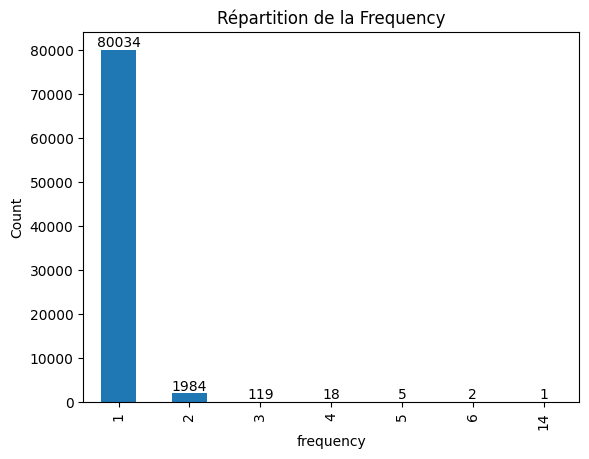

In [13]:
import matplotlib.pyplot as plt

# Créer le graphique à barres
ax = df_rfm['frequency'].value_counts().sort_index().plot(kind='bar')

# Ajouter les annotations
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

# Ajouter les titres et labels
plt.title('Répartition de la Frequency')
plt.xlabel('frequency')
plt.ylabel('Count')
plt.show()

Cette répartition nous indique qu'il va être impossible de créer des quartiles sur la colonne "frequency", la répartition est beaucoup trop inégale:  
**On va par conséquent segmenter de cette manière:**
- **G1:** 1 achat
- **G2:** 2 achats
- **G3:** 3 achats
- **G4:** Plus de 3 achats

## 1# Création du RFM_score

In [14]:
# Fonction assignant un score pour une valeur frequency donnée
def assign_frequency_group(row):
    if row['frequency'] == 1:
        return 1
    elif row['frequency'] == 2:
        return 2
    elif row['frequency'] == 3:
        return 3
    else:
        return 4

# On définit les labels RFM
r_labels = range(4, 0, -1)
m_labels = range(1, 5)

# Calcul des scores 'R', 'F' et 'M's
df_rfm['R'] = pd.qcut(df_rfm['recency'], 4, labels=r_labels)
df_rfm['F'] = df_rfm.apply(assign_frequency_group, axis=1)
df_rfm['M'] = pd.qcut(df_rfm['monetary_value'], 4, labels=m_labels)

# Création du RFM_Score
df_rfm['RFM_Score'] = df_rfm[['R', 'F', 'M']].sum(axis=1)

In [15]:
df_rfm.head()

,customer_unique_id,recency,frequency,monetary_value,R,F,M,RFM_Score
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90,4,1,3,8
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19,3,1,1,5
2,0000f46a3911fa3c0805444483337064,537,1,86.22,1,1,2,4
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,2,1,1,4
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89,2,1,4,7


In [16]:
unique_values = df_rfm['RFM_Score'].unique()
print(unique_values)

[ 8  5  4  7  3  6  9 10 11 12]


## 2# Segmentation des clients

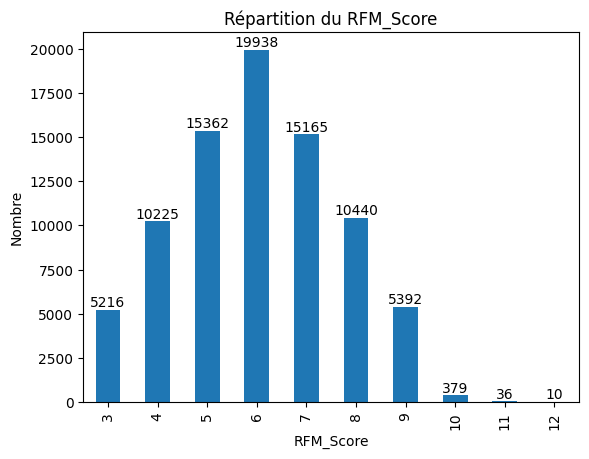

In [17]:
import matplotlib.pyplot as plt

# Créer le graphique à barres
ax = df_rfm['RFM_Score'].value_counts().sort_index().plot(kind='bar')

# Ajouter les annotations
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

# Ajouter les titres et labels
plt.title('Répartition du RFM_Score')
plt.xlabel('RFM_Score')
plt.ylabel('Nombre')
plt.show()

**On sépare les clients en 4:**
- "Worst -> 1er quartile dans le RFM_Score
- "Bad" -> 2eme quartile dans le RFM_Score
- "Good" -> 3eme quartile dans le RFM_Score
- "Best" -> dernier quartille dans le RFM_Score

In [18]:
# Importer la bibliothèque pandas
import pandas as pd

# Définir les étiquettes et les intervalles de quartiles
quartiles = ['Worst', 'Bad', 'Good', 'Best']

# Utiliser pd.qcut pour créer la nouvelle colonne
df_rfm['customer_health'] = pd.qcut(df_rfm['RFM_Score'], 
                                    q=4, 
                                    labels=quartiles)

In [19]:
df_rfm.head()

,customer_unique_id,recency,frequency,monetary_value,R,F,M,RFM_Score,customer_health
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90,4,1,3,8,Best
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19,3,1,1,5,Worst
2,0000f46a3911fa3c0805444483337064,537,1,86.22,1,1,2,4,Worst
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,2,1,1,4,Worst
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89,2,1,4,7,Good


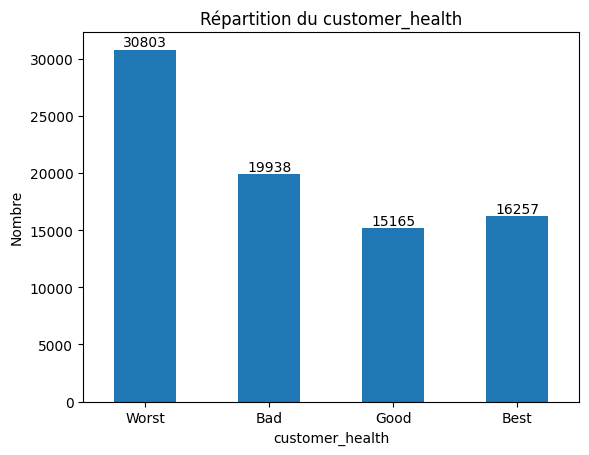

In [20]:
import matplotlib.pyplot as plt

# Créer le graphique à barres
ax = df_rfm['customer_health'].value_counts().sort_index().plot(kind='bar')

# Ajouter les annotations
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

# Ajouter les titres et labels
plt.title('Répartition du customer_health')
plt.xlabel('customer_health')
plt.ylabel('Nombre')

# Rotation des labels de l'axe des abscisses
plt.xticks(rotation='horizontal')  # 'horizontal' est équivalent à 0

plt.show()

# Option A: Clustering sur tout les clients

## 1# Clustering k-means

In [21]:
df

,customer_unique_id,order_delivered_customer_date,review_score,payment_installments,price,product_photos_qty,product_length_cm,product_height_cm,product_width_cm,delivery_lead_Time,product_weight_g,recency,frequency,monetary_value,freight_value_percentage,customer_state_RJ,seller_state_DF,product_category_name_english_books_imported,product_category_name_english_food_drink,product_category_name_english_sports_leisure,customer_state_SC,product_category_name_english_toys,seller_state_MT,product_category_name_english_stationery,product_category_name_english_dvds_blu_ray,product_category_name_english_art,product_category_name_english_cds_dvds_musicals,seller_state_GO,seller_state_MS,product_category_name_english_construction_tools_construction,customer_state_RR,product_category_name_english_office_furniture,seller_state_AM,product_category_name_english_construction_tools_lights,payment_type_credit_card,customer_state_BA,payment_type_boleto,product_category_name_english_health_beauty,product_category_name_english_christmas_supplies,product_category_name_english_signaling_and_security,seller_state_RN,product_category_name_english_kitchen_dining_laundry_garden_furniture,seller_state_MA,seller_state_PI,seller_state_PE,customer_state_TO,customer_state_PI,seller_state_SC,seller_state_PA,product_category_name_english_fashion_shoes,product_category_name_english_agro_industry_and_commerce,seller_state_ES,customer_state_DF,product_category_name_english_industry_commerce_and_business,customer_state_RO,customer_state_MA,product_category_name_english_audio,product_category_name_english_books_technical,product_category_name_english_arts_and_craftmanship,product_category_name_english_books_general_interest,customer_state_CE,customer_state_PB,product_category_name_english_furniture_living_room,product_category_name_english_diapers_and_hygiene,product_category_name_english_auto,product_category_name_english_telephony,product_category_name_english_fashion_underwear_beach,seller_state_SE,customer_state_RS,product_category_name_english_pet_shop,product_category_name_english_home_comfort_2,product_category_name_english_watches_gifts,product_category_name_english_small_appliances,seller_state_PR,seller_state_PB,product_category_name_english_fashio_female_clothing,customer_state_RN,product_category_name_english_computers,seller_state_RJ,product_category_name_english_furniture_decor,product_category_name_english_cool_stuff,product_category_name_english_home_appliances,product_category_name_english_fashion_male_clothing,product_category_name_english_perfumery,seller_state_RS,product_category_name_english_music,product_category_name_english_food,product_category_name_english_home_construction,product_category_name_english_tablets_printing_image,customer_state_PR,customer_state_AP,customer_state_PA,product_category_name_english_air_conditioning,seller_state_MG,product_category_name_english_security_and_services,product_category_name_english_costruction_tools_tools,product_category_name_english_furniture_mattress_and_upholstery,product_category_name_english_cine_photo,customer_state_SE,customer_state_SP,seller_state_SP,customer_state_MS,customer_state_ES,product_category_name_english_party_supplies,product_category_name_english_home_confort,product_category_name_english_housewares,customer_state_AC,customer_state_AL,product_category_name_english_baby,customer_state_AM,product_category_name_english_construction_tools_safety,product_category_name_english_market_place,payment_type_debit_card,product_category_name_english_luggage_accessories,product_category_name_english_small_appliances_home_oven_and_coffee,customer_state_MT,product_category_name_english_electronics,product_category_name_english_garden_tools,seller_state_BA,product_category_name_english_fashion_childrens_clothes,product_category_name_english_fashion_sport,product_category_name_english_computers_accessories,seller_state_CE,seller_state_RO,product_category_name_english_drinks,product_category_nam

### 0# Utilisation PCA

In [22]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Sélectionner les colonnes quantitatives
df_quant = df.select_dtypes(include=[float])

# Standardisation des données 
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_quant)

# Application de PCA
pca = PCA()
df_pca = pca.fit_transform(df_scaled)

# Calcul du nombre de composantes nécessaires pour expliquer 90% de la variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Trouver le nombre minimum de composantes telles que 90% de la variance soit expliquée
num_components = np.where(cumulative_variance >= 0.9)[0][0] + 1

print(f"{num_components} composantes principales sont nécessaires pour expliquer 90% de la variance.")


9 composantes principales sont nécessaires pour expliquer 90% de la variance.


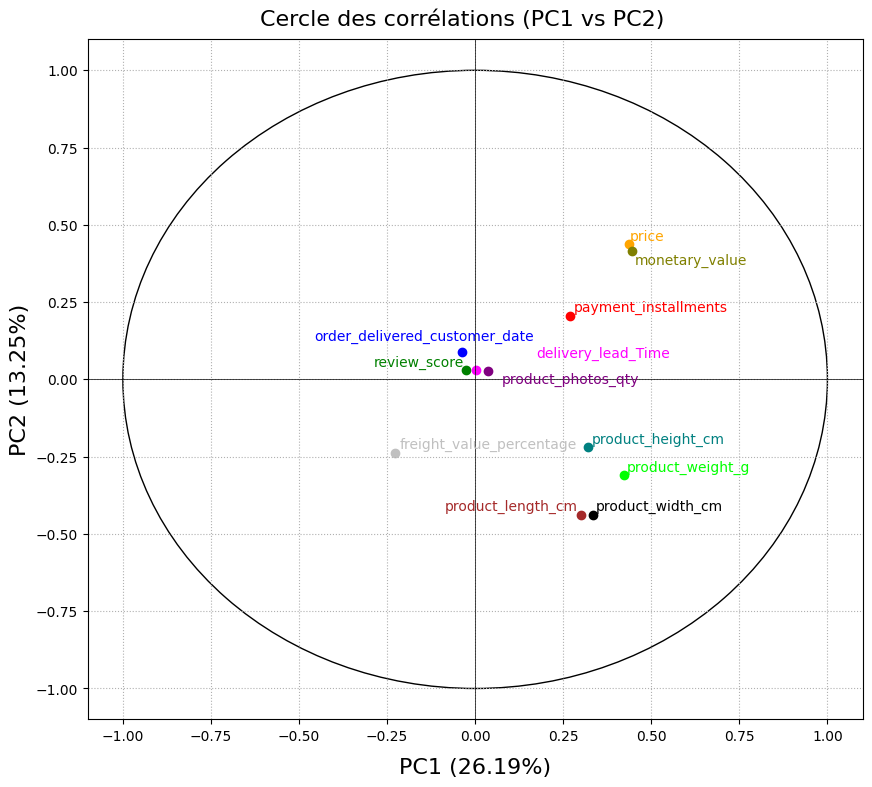

,PC1,PC2
order_delivered_customer_date,-0.036539,0.089856
review_score,-0.024782,0.029008
payment_installments,0.268469,0.204392
price,0.435869,0.436838
product_photos_qty,0.036040,0.026159
product_length_cm,0.301887,-0.438737
product_height_cm,0.320222,-0.219930
product_width_cm,0.334065,-0.438540
delivery_lead_Time,0.002959,0.029317
product_weight_g,0.422775,-0.310651


In [23]:
# Créer le premier graphique (PC1 vs PC2)
plot_PCA(df, 1, 2)

On va ajouter les 9 colonnes

In [24]:
df_pca = ajouter_colonnes_PCA(df, nb_PCA=9)

In [25]:
df_features = df_pca.loc[:, ["PCA1", "PCA2", "PCA3", "PCA4", "PCA5", "PCA6", "PCA7", "PCA8", "PCA9"]]

In [26]:
results = cluster_analysis_k_means(df_features)
results = results.reset_index(drop=True)

In [27]:
results

,K,Silhouette,Davies-Bouldin,Silhouette Rank,Davies-Bouldin Rank,Rank Mean,Rank Final
0,3,0.566517,0.531162,2.0,1.0,1.5,1.0
1,2,0.596985,0.550333,1.0,4.0,2.5,2.0
2,5,0.541991,0.537989,3.0,2.0,2.5,2.0
3,4,0.530715,0.546265,4.0,3.0,3.5,4.0
4,6,0.518052,0.560281,5.0,6.0,5.5,5.0
5,7,0.511454,0.557140,6.0,5.0,5.5,5.0
6,9,0.500581,0.574001,7.0,7.0,7.0,7.0
7,8,0.498685,0.578426,8.0,8.0,8.0,8.0
8,10,0.498015,0.585844,9.0,9.0,9.0,9.0


In [28]:
k_means_pca = pd.DataFrame(results.iloc[0]).transpose()
k_means_pca.rename(index={0: 'k-means: features pca'}, inplace=True)
k_means_pca = k_means_pca.drop(['Silhouette Rank', 'Davies-Bouldin Rank', 'Rank Mean', 'Rank Final'], axis=1)
k_means_pca

,K,Silhouette,Davies-Bouldin
k-means: features pca,3.0,0.566517,0.531162


### 1# Utilisation des features R F M

- Silouhette: Score entre -1 et 1 (optimal = 1)
- Index de Davies Bouldin: Score entre 0 et ∞ (optimal = 0)

In [29]:
df_features = df.loc[:, ["customer_unique_id", "recency", "frequency", "monetary_value"]]

In [30]:
results = cluster_analysis_k_means(df_features)
results = results.reset_index(drop=True)

In [31]:
results

,K,Silhouette,Davies-Bouldin,Silhouette Rank,Davies-Bouldin Rank,Rank Mean,Rank Final
0,2,0.728340,0.662312,1.0,1.0,1.0,1.0
1,4,0.464644,0.712560,2.0,2.0,2.0,2.0
2,7,0.407597,0.737920,5.0,3.0,4.0,3.0
3,8,0.410615,0.744419,4.0,4.0,4.0,3.0
4,3,0.444456,0.772769,3.0,7.0,5.0,5.0
5,6,0.404358,0.755529,6.0,5.0,5.5,6.0
6,10,0.364426,0.756690,8.0,6.0,7.0,7.0
7,5,0.387878,0.793567,7.0,9.0,8.0,8.0
8,9,0.361798,0.783521,9.0,8.0,8.5,9.0


In [32]:
k_means_rfm = pd.DataFrame(results.iloc[0]).transpose()
k_means_rfm.rename(index={0: 'k-means: feature rfm'}, inplace=True)
k_means_rfm = k_means_rfm.drop(['Silhouette Rank', 'Davies-Bouldin Rank', 'Rank Mean', 'Rank Final'], axis=1)
k_means_rfm

,K,Silhouette,Davies-Bouldin
k-means: feature rfm,2.0,0.72834,0.662312


### 2# Ajout feature "review_score"

In [33]:
df_features = df.loc[:, ["customer_unique_id", "recency", "frequency", "monetary_value", "review_score"]]

In [34]:
results = cluster_analysis_k_means(df_features)
results = results.reset_index(drop=True)

In [35]:
results

,K,Silhouette,Davies-Bouldin,Silhouette Rank,Davies-Bouldin Rank,Rank Mean,Rank Final
0,2,0.728365,0.662264,1.0,1.0,1.0,1.0
1,4,0.464593,0.712611,2.0,2.0,2.0,2.0
2,7,0.407458,0.737506,5.0,3.0,4.0,3.0
3,8,0.410374,0.745275,4.0,4.0,4.0,3.0
4,3,0.444340,0.772871,3.0,7.0,5.0,5.0
5,6,0.404274,0.755627,6.0,5.0,5.5,6.0
6,10,0.364374,0.756589,8.0,6.0,7.0,7.0
7,5,0.387787,0.793670,7.0,9.0,8.0,8.0
8,9,0.361518,0.782524,9.0,8.0,8.5,9.0


In [36]:
k_means_rfm_review = pd.DataFrame(results.iloc[0]).transpose()
k_means_rfm_review.rename(index={0: 'k-means: feature rfm + review_score'}, inplace=True)
k_means_rfm_review = k_means_rfm_review.drop(['Silhouette Rank', 'Davies-Bouldin Rank', 'Rank Mean', 'Rank Final'], axis=1)
k_means_rfm_review

,K,Silhouette,Davies-Bouldin
k-means: feature rfm + review_score,2.0,0.728365,0.662264


**Ajouter la feature review_score diminue la qualité du clustering**

### 3# Ajout feature "delivery_lead_Time"

In [37]:
df_features = df.loc[:, ["customer_unique_id", "recency", "frequency", "monetary_value", "review_score", "delivery_lead_Time"]]

In [38]:
results = cluster_analysis_k_means(df_features)
results = results.reset_index(drop=True)

In [39]:
display(results)

,K,Silhouette,Davies-Bouldin,Silhouette Rank,Davies-Bouldin Rank,Rank Mean,Rank Final
0,9,0.553713,0.518414,1.0,1.0,1.0,1.0
1,8,0.548912,0.518579,2.0,2.0,2.0,2.0
2,7,0.548076,0.520204,3.0,3.0,3.0,3.0
3,10,0.546961,0.520553,4.0,4.0,4.0,4.0
4,5,0.531686,0.552035,6.0,6.0,6.0,5.0
5,3,0.532257,0.617118,5.0,8.0,6.5,6.0
6,6,0.519144,0.536249,8.0,5.0,6.5,6.0
7,4,0.526504,0.585488,7.0,7.0,7.0,8.0
8,2,0.509932,0.705165,9.0,9.0,9.0,9.0


In [40]:
k_means_rfm_delivery = pd.DataFrame(results.iloc[0]).transpose()
k_means_rfm_delivery.rename(index={0: 'k-means: feature rfm + review_score + delivery_lead_Time'}, inplace=True)
k_means_rfm_delivery = k_means_rfm_delivery.drop(['Silhouette Rank', 'Davies-Bouldin Rank', 'Rank Mean', 'Rank Final'], axis=1)
k_means_rfm_delivery

,K,Silhouette,Davies-Bouldin
k-means: feature rfm + review_score + delivery_lead_Time,9.0,0.553713,0.518414


**Ajouter la feature delivery_lead_Time diminue la qualité du clustering**

### Comparaison

In [41]:
result = pd.concat([k_means_pca, k_means_rfm, k_means_rfm_review, k_means_rfm_delivery], axis=0)
result

,K,Silhouette,Davies-Bouldin
k-means: features pca,3.0,0.566517,0.531162
k-means: feature rfm,2.0,0.728340,0.662312
k-means: feature rfm + review_score,2.0,0.728365,0.662264
k-means: feature rfm + review_score + delivery_lead_Time,9.0,0.553713,0.518414


In [42]:
# Définir une fonction qui colore le meilleur score en vert.
def color_best_val_green(col):
    best_val = col.min() if col.name == 'Davies-Bouldin' else col.max()
    color = ['background-color: green' if v == best_val else '' for v in col]
    return color

# Appliquer la fonction seulement aux colonnes Silhouette et Davies-Bouldin
result.style.apply(color_best_val_green, subset=['Silhouette', 'Davies-Bouldin'])

,K,Silhouette,Davies-Bouldin
k-means: features pca,3.000000,0.566517,0.531162
k-means: feature rfm,2.000000,0.728340,0.662312
k-means: feature rfm + review_score,2.000000,0.728365,0.662264
k-means: feature rfm + review_score + delivery_lead_Time,9.000000,0.553713,0.518414


On va désormais prendre comme features ceux ci:
- recency
- frequency
- monetary_value
- review_score

## df = Sample

DBSCAN et Ward demandent beaucoup trop de RAM si on utilisait les 80000 clients, on va plutot créer un sample pour pouvoir effectuer les tests

In [64]:
df = df[["customer_unique_id", "recency", "frequency", "monetary_value", "review_score"]]

L'échantillon est suffisamment représentatif de l'ensemble de données après 1 tentative.


,Variable,Diff_Moyenne_Relative,Diff_Mediane_Relative,Diff_EcartType_Relative
0,recency,0.260377,0.460829,0.348250
1,frequency,0.016638,0.000000,2.215793
2,monetary_value,0.454801,0.086990,0.798681
3,review_score,0.070250,0.000000,0.588182


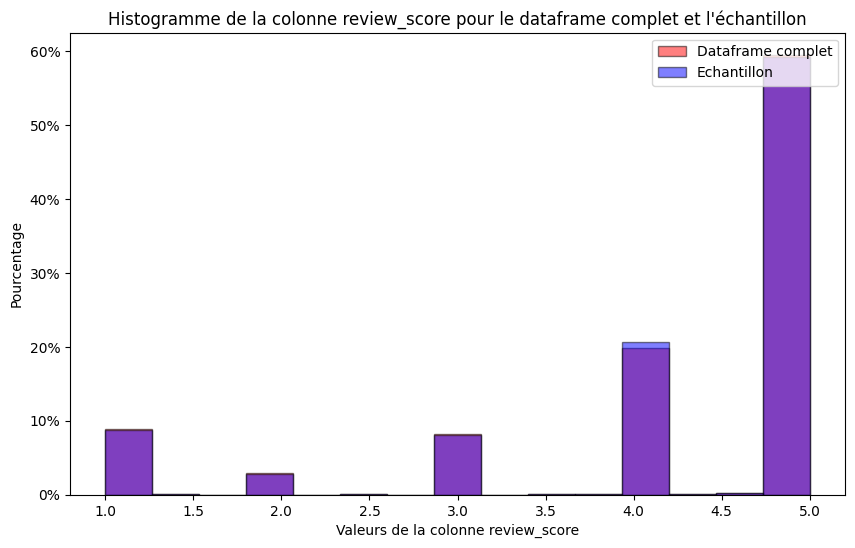

In [66]:
sample = trouver_le_bon_sample(df, proportion=20, threshold=5, tentatives=100)

In [67]:
sample

,customer_unique_id,recency,frequency,monetary_value,review_score
28855,59548bde3cc3a8febcfca6cc70a538dd,197,1,119.48,5.0
66431,cec0a492aeb0bdd76f1eec9daae66740,293,1,703.63,5.0
73848,e5cf9da72b751849b7b217f7a943d0fa,40,1,107.96,4.0
28939,599cc170f396e979a4c2d8e1bc4fa18e,132,1,138.75,5.0
24301,4b69e54d9e0ce3ae3f2e3744fd29049c,276,1,53.00,3.0
...,...,...,...,...,...
54107,a82f438afd97af12cb9ef7b49f560134,409,1,97.71,2.0
40369,7d4ed299c3c41701c0558287cad39827,60,1,63.92,5.0
15848,3132c45b19577f0ec2ab05c887dc1edc,201,1,148.06,5.0
71658,dedaf53395a6c35ffe9c422db83d3fd7,385,1,212.84,5.0


In [68]:
df = sample

## 2# Clustering DBSCAN

Silouhette: Score entre -1 et 1 (optimal = 1)  
Index de Davies Bouldin: Score entre 0 et ∞ (optimal = 0)

Ici on utilisera un sample au lieu d'utiliser tout le dataset, DBSCAN demande trop de ram pour 80000 clients

In [69]:
df_features = df.loc[:, ["customer_unique_id", "recency", "frequency", "monetary_value", "review_score"]]

In [70]:
results = cluster_analysis_DBSCAN(df_features)
results = results.reset_index(drop=True)

In [71]:
results

,K,Epsilon,MinPts,Silhouette,Davies-Bouldin,NoisePercent,Silhouette Rank,Davies-Bouldin Rank,Noise Rank,Rank Mean,Rank Final
0,3,2.311111,6,0.662440,1.069498,0.079109,1.0,1.0,13.0,5.000000,1.0
1,3,2.311111,10,0.662440,1.069498,0.079109,1.0,1.0,13.0,5.000000,1.0
2,3,2.311111,9,0.662440,1.069498,0.079109,1.0,1.0,13.0,5.000000,1.0
3,3,2.311111,8,0.662440,1.069498,0.079109,1.0,1.0,13.0,5.000000,1.0
4,3,2.311111,7,0.662440,1.069498,0.079109,1.0,1.0,13.0,5.000000,1.0
5,3,2.311111,5,0.662440,1.069498,0.079109,1.0,1.0,13.0,5.000000,1.0
6,3,4.522222,8,0.661363,1.239539,0.030427,8.0,7.0,3.0,6.000000,7.0
7,3,4.522222,7,0.661363,1.239539,0.030427,8.0,7.0,3.0,6.000000,7.0
8,3,4.522222,6,0.661363,1.239539,0.030427,8.0,7.0,3.0,6.000000,7.0
9,3,4.522222,5,0.661363,1.239539,0.030427,8.0,7.0,3.0,6.000000,7.0


In [72]:
dbscan = pd.DataFrame(results.iloc[0]).transpose()
dbscan.rename(index={0: 'DBSCAN'}, inplace=True)
dbscan = dbscan.drop(['Silhouette Rank', 'Davies-Bouldin Rank', 'Rank Mean', 'Rank Final', 'Noise Rank'], axis=1)
dbscan

,K,Epsilon,MinPts,Silhouette,Davies-Bouldin,NoisePercent
DBSCAN,3.0,2.311111,6.0,0.66244,1.069498,0.079109


## 3# Clustering de Ward

In [73]:
df_features = df.loc[:, ["customer_unique_id", "recency", "frequency", "monetary_value", "review_score"]]

In [74]:
results = cluster_analysis_ward(df_features)
results = results.reset_index(drop=True)

In [75]:
results

,K,Silhouette,Davies-Bouldin,Silhouette Rank,Davies-Bouldin Rank,Rank Mean,Rank Final
0,2,0.683916,0.549232,1.0,1.0,1.0,1.0
1,3,0.457888,0.744652,2.0,3.0,2.5,2.0
2,5,0.377147,0.738617,4.0,2.0,3.0,3.0
3,10,0.312907,0.870383,6.0,4.0,5.0,4.0
4,4,0.392676,0.915070,3.0,8.0,5.5,5.0
5,6,0.348350,0.890385,5.0,6.0,5.5,5.0
6,9,0.312363,0.881580,7.0,5.0,6.0,7.0
7,8,0.310706,0.901304,8.0,7.0,7.5,8.0
8,7,0.289410,0.948512,9.0,9.0,9.0,9.0


In [76]:
ward = pd.DataFrame(results.iloc[0]).transpose()
ward.rename(index={0: 'ward'}, inplace=True)
ward = ward.drop(['Silhouette Rank', 'Davies-Bouldin Rank', 'Rank Mean', 'Rank Final'], axis=1)
ward

,K,Silhouette,Davies-Bouldin
ward,2.0,0.683916,0.549232


## Comparaison

In [77]:
k_means_rfm.rename(index={'k-means: feature rfm': 'k-means'}, inplace=True)

In [78]:
k_means = k_means_rfm

In [79]:
k_means

,K,Silhouette,Davies-Bouldin
k-means,2.0,0.72834,0.662312


In [80]:
result = pd.concat([k_means, dbscan, ward], axis=0)
result

,K,Silhouette,Davies-Bouldin,Epsilon,MinPts,NoisePercent
k-means,2.0,0.728340,0.662312,NaN,NaN,NaN
DBSCAN,3.0,0.662440,1.069498,2.311111,6.0,0.079109
ward,2.0,0.683916,0.549232,NaN,NaN,NaN


In [81]:
# Réorganiser les colonnes
columns = result.columns.tolist()
columns.remove('Silhouette')
columns.remove('Davies-Bouldin')
columns.extend(['Silhouette', 'Davies-Bouldin'])
result = result.reindex(columns=columns)

# Définir une fonction qui colore le meilleur score en vert.
def color_best_val_green(col):
    best_val = col.min() if col.name == 'Davies-Bouldin' else col.max()
    color = ['background-color: green' if v == best_val else '' for v in col]
    return color

# Appliquer la fonction seulement aux colonnes Silhouette et Davies-Bouldin
result.style.apply(color_best_val_green, subset=['Silhouette', 'Davies-Bouldin'])

,K,Epsilon,MinPts,NoisePercent,Silhouette,Davies-Bouldin
k-means,2.000000,nan,nan,nan,0.728340,0.662312
DBSCAN,3.000000,2.311111,6.000000,0.079109,0.662440,1.069498
ward,2.000000,nan,nan,nan,0.683916,0.549232


**k-means est à privilégier**

## Analyse de nos clusters

In [27]:
df = pd.read_csv('data_cleaned.csv', sep = ",")

In [28]:
df = df[["customer_unique_id", "recency", "frequency", "monetary_value", "review_score"]]

In [29]:
df

,customer_unique_id,recency,frequency,monetary_value,review_score
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90,5.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19,4.0
2,0000f46a3911fa3c0805444483337064,537,1,86.22,3.0
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,4.0
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89,5.0
...,...,...,...,...,...
82158,fffcf5a5ff07b0908bd4e2dbc735a684,447,1,2067.42,5.0
82159,fffea47cd6d3cc0a88bd621562a9d061,262,1,84.58,4.0
82160,ffff371b4d645b6ecea244b27531430a,568,1,112.46,5.0
82161,ffff5962728ec6157033ef9805bacc48,119,1,133.69,5.0


In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

def clustering_kmeans(df, nb_k):
    # Séparation des colonnes qualitatives et quantitatives
    colonnes_qualitatives = df.select_dtypes(include='object')
    colonnes_quantitatives = df.select_dtypes(exclude='object')

    # Normalisation des colonnes quantitatives
    scaler = StandardScaler()
    colonnes_quantitatives_normalisees = scaler.fit_transform(colonnes_quantitatives)

    # Clustering k-means
    kmeans = KMeans(n_clusters=nb_k, n_init = 10, random_state=42)
    clusters = kmeans.fit_predict(colonnes_quantitatives_normalisees)

    # Ajout des clusters au DataFrame d'origine
    df_cluster = df.copy()
    df_cluster['cluster'] = clusters

    # Réorganisation des colonnes pour placer 'cluster' en première position
    colonne_cluster = df_cluster.pop('cluster')
    df_cluster.insert(0, 'cluster', colonne_cluster)

    return df_cluster

In [31]:
df = clustering_kmeans(df, nb_k = 2)

In [32]:
df.head()

,cluster,customer_unique_id,recency,frequency,monetary_value,review_score
0,0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90,5.0
1,0,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19,4.0
2,0,0000f46a3911fa3c0805444483337064,537,1,86.22,3.0
3,0,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,4.0
4,0,0004aac84e0df4da2b147fca70cf8255,288,1,196.89,5.0


In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

def plot(df, column_name, x_min=None, x_max=None, x_scale='linear', y_scale='linear'):
    plt.figure(figsize=(20,6))

    global_min = df[column_name].min() if x_min is None else x_min
    global_max = df[column_name].max() if x_max is None else x_max

    clusters = df['cluster'].unique()
    palette = sns.color_palette("hls", len(clusters))

    for i, cluster in enumerate(clusters):
        cluster_data = df[df['cluster']==cluster][column_name]
        if np.var(cluster_data) == 0:  
            plt.axvline(cluster_data.iloc[0], color=palette[i], linestyle='dashed')
            print(f"Cluster {cluster} has 0 variance; density estimation skipped.")
        else:
            sns.kdeplot(cluster_data, color=palette[i], fill=True)

    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0)) 
    plt.xscale(x_scale)
    plt.yscale(y_scale)
    plt.xlim(global_min, global_max)
    plt.legend(title='Clusters', labels=clusters)
    plt.title('Distribution de {} par Cluster'.format(column_name))
    plt.xlabel('{}'.format(column_name))
    plt.ylabel('Densité') 
    plt.show()

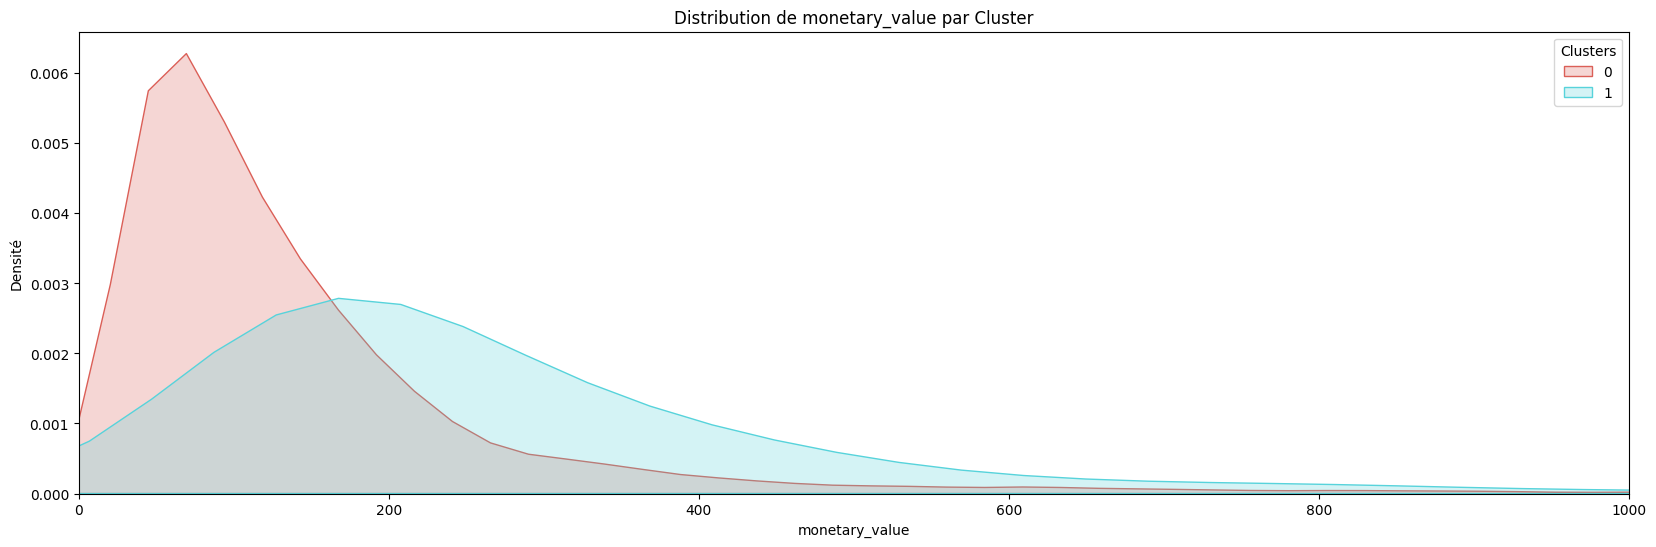

In [34]:
plot(df, "monetary_value", x_min=0, x_max=1000)

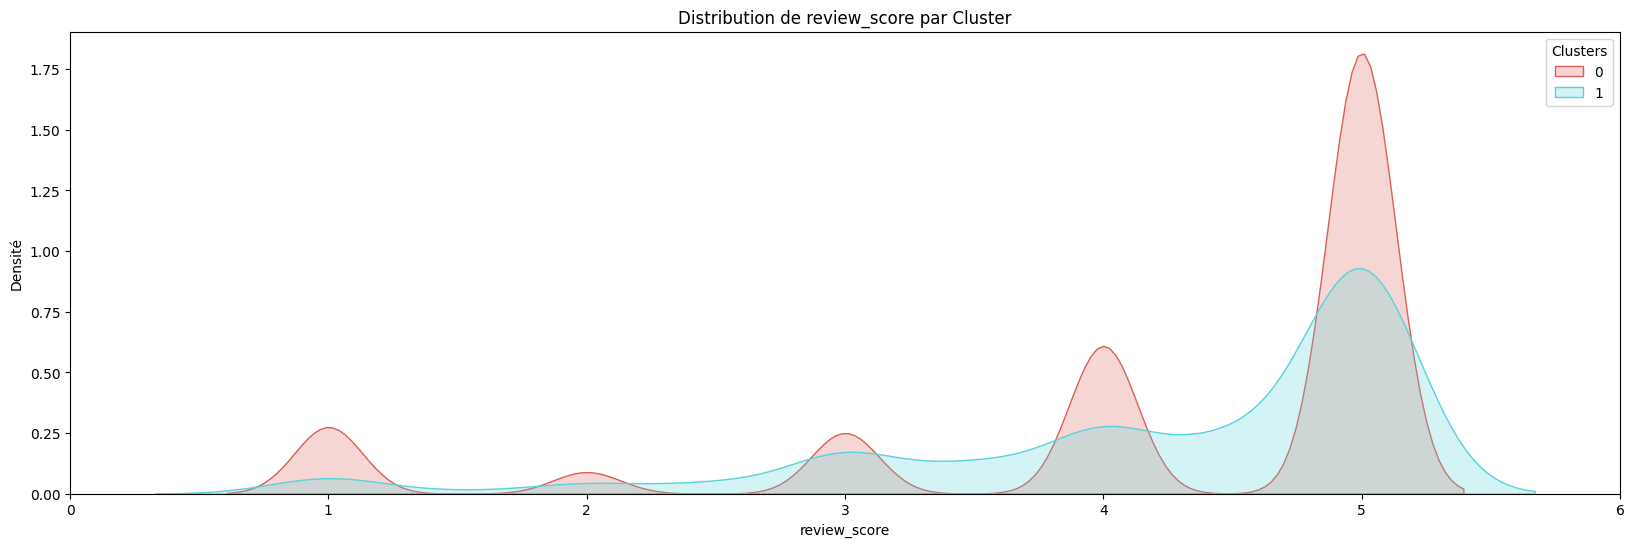

In [35]:
plot(df, "review_score", x_min=0, x_max=6)

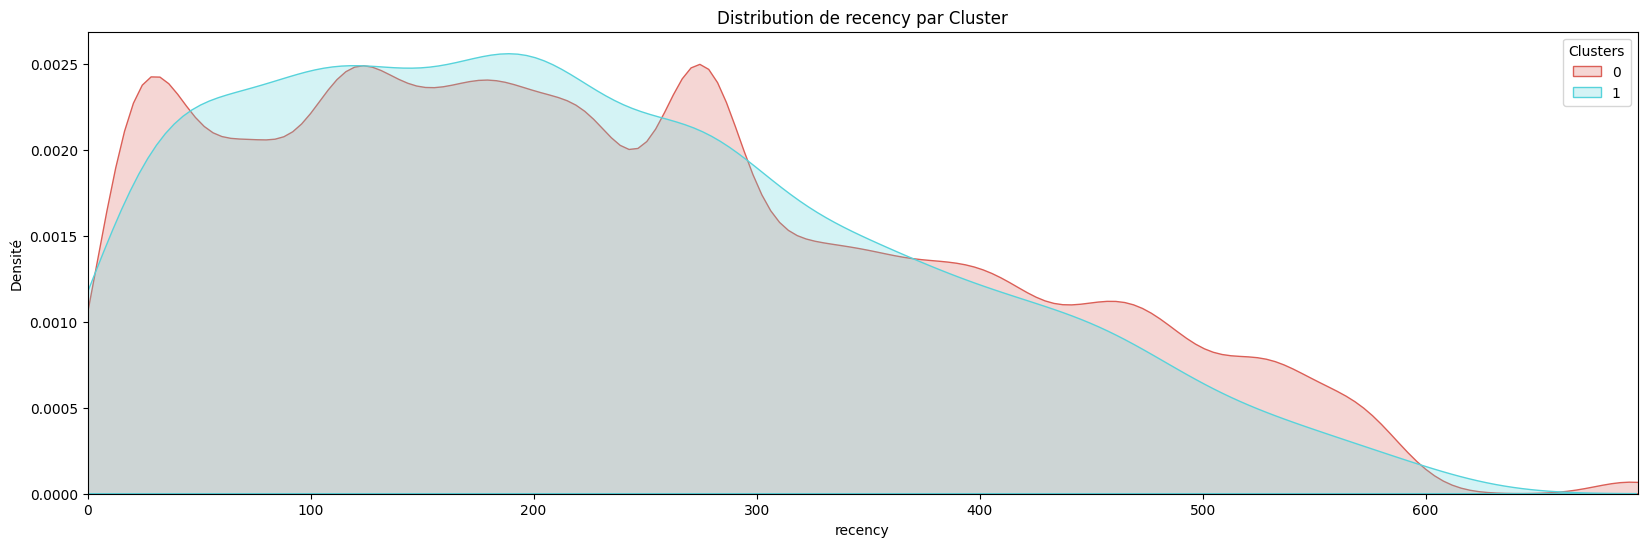

In [36]:
plot(df, "recency", x_min=0, x_max=None)

Cluster 0 has 0 variance; density estimation skipped.


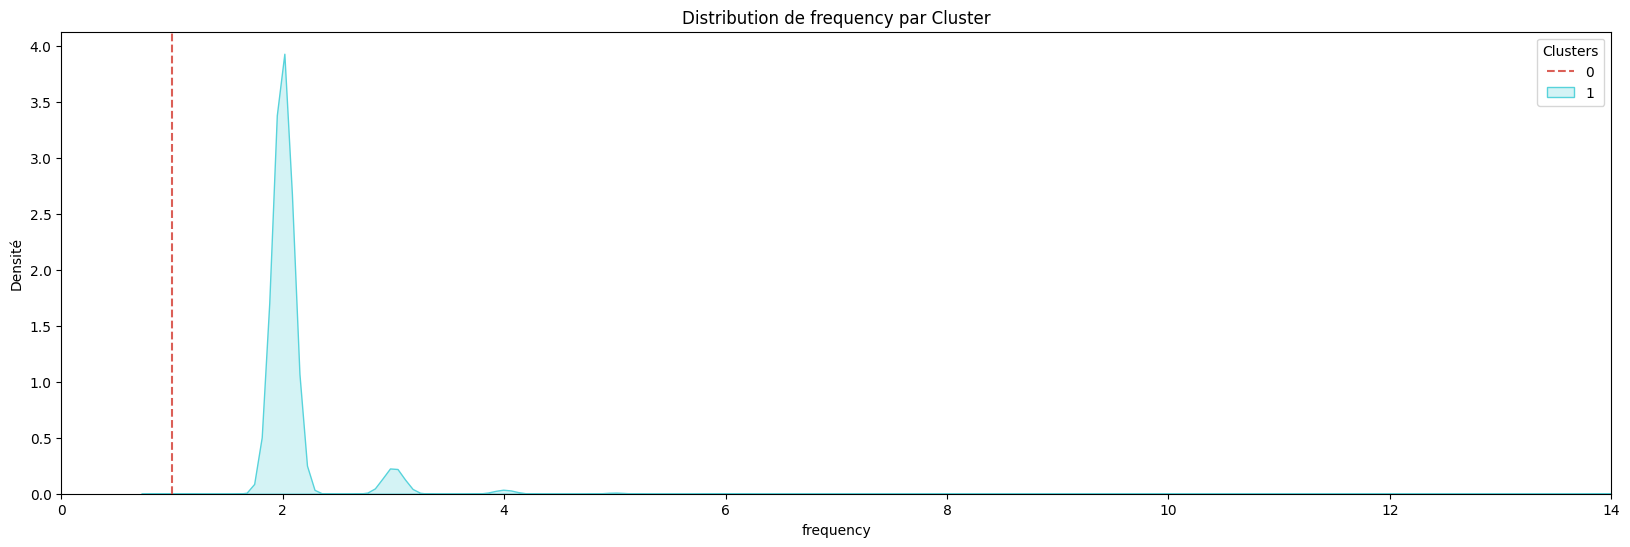

In [37]:
plot(df, "frequency", x_min=0, x_max=None, y_scale='linear')

**On se rend compte que le cluster 0 possède quasiment tout les clients ayant effectué une seul commande**

In [38]:
df.to_csv('data_cluster.csv', index=False)

In [39]:
import pandas as pd

# Grouper par 'frequency' et 'cluster' et compter le nombre d'occurrences
cluster_counts = df.groupby(['frequency', 'cluster']).size().reset_index(name='counts')

# Grouper par 'frequency' et obtenir le total pour chaque 'frequency'
frequency_totals = df.groupby('frequency').size().reset_index(name='totals')

# Fusionner les deux DataFrames sur 'frequency'
merged = pd.merge(cluster_counts, frequency_totals, on='frequency')

# Calculer le pourcentage de représentation pour chaque 'cluster' dans chaque 'frequency'
merged['percentage'] = (merged['counts'] / merged['totals']) * 100

merged

,frequency,cluster,counts,totals,percentage
0,1,0,80032,80034,99.997501
1,1,1,2,80034,0.002499
2,2,1,1984,1984,100.000000
3,3,1,119,119,100.000000
4,4,1,18,18,100.000000
5,5,1,5,5,100.000000
6,6,1,2,2,100.000000
7,14,1,1,1,100.000000


**k-means a tout simplement séparé les clients ayant fait une seule commande des clients ayant fait 2 commandes ou plus:**
- On peut aller plus loin et par conséquent s'intéresser uniquement aux clients ayant fait 2 commandes ou plus

# Option B: Clustering sur les clients ayant effectué 2 commandes ou plus

In [7]:
df = pd.read_csv('data_cleaned.csv', sep = ",")

In [8]:
df = df[df['frequency'] != 1]

In [9]:
df

,customer_unique_id,order_delivered_customer_date,review_score,payment_installments,price,product_photos_qty,product_length_cm,product_height_cm,product_width_cm,delivery_lead_Time,...,payment_type_voucher,product_category_name_english_furniture_bedroom,product_category_name_english_costruction_tools_garden,product_category_name_english_home_appliances_2,product_category_name_english_musical_instruments,customer_state_MG,product_category_name_english_fashion_bags_accessories,customer_state_GO,product_category_name_english_flowers,customer_state_PE
93,004288347e5e88a27ded2bb23747066c,1.509132e+09,5.000000,2.0,317.89,1.000000,31.500000,36.000000,33.500000,1.442366e+06,...,0,0,0,0,0,0,0,0,0,0
222,00a39521eb40f7012db50455bf083460,1.529087e+09,4.000000,1.0,81.45,1.000000,19.000000,11.500000,13.000000,1.575410e+06,...,0,0,0,0,0,0,0,0,0,0
273,00cc12a6d8b578b8ebd21ea4e2ae8b27,1.490664e+09,3.000000,1.0,99.80,1.500000,32.000000,11.500000,24.000000,1.032465e+06,...,0,0,0,0,0,0,0,0,0,0
364,011575986092c30523ecb71ff10cb473,1.522647e+09,3.500000,1.5,182.90,6.500000,27.500000,11.500000,22.500000,8.006880e+05,...,0,0,0,0,1,1,0,0,0,0
416,013ef03e0f3f408dd9bf555e4edcdc0a,1.531118e+09,5.000000,2.0,226.34,3.500000,34.000000,10.000000,28.500000,1.142551e+06,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81787,fed519569d16e690df6f89cb99d4e682,1.519530e+09,5.000000,10.0,249.90,5.500000,32.000000,24.500000,25.500000,5.484605e+05,...,0,0,0,0,0,0,0,0,0,0
81851,ff03923ad1eb9e32304deb7f9b2a45c9,1.526577e+09,3.000000,1.5,220.64,1.000000,19.000000,10.000000,15.000000,6.730910e+05,...,1,0,0,0,0,0,0,0,0,0
82020,ff8892f7c26aa0446da53d01b18df463,1.506851e+09,3.500000,8.0,277.95,2.000000,20.500000,10.000000,15.500000,-3.807865e+05,...,0,0,0,0,0,0,0,0,0,0
82034,ff922bdd6bafcdf99cb90d7f39cea5b3,1.500361e+09,4.333333,2.0,94.79,2.666667,28.666667,20.666667,14.333333,6.666867e+05,...,0,0,0,0,0,0,1,0,0,0


## 1# Clustering k-means

### 0# Utilisation PCA

In [10]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Sélectionner les colonnes quantitatives
df_quant = df.select_dtypes(include=[float])

# Standardisation des données 
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_quant)

# Application de PCA
pca = PCA()
df_pca = pca.fit_transform(df_scaled)

# Calcul du nombre de composantes nécessaires pour expliquer 90% de la variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Trouver le nombre minimum de composantes telles que 90% de la variance soit expliquée
num_components = np.where(cumulative_variance >= 0.9)[0][0] + 1

print(f"{num_components} composantes principales sont nécessaires pour expliquer 90% de la variance.")


9 composantes principales sont nécessaires pour expliquer 90% de la variance.


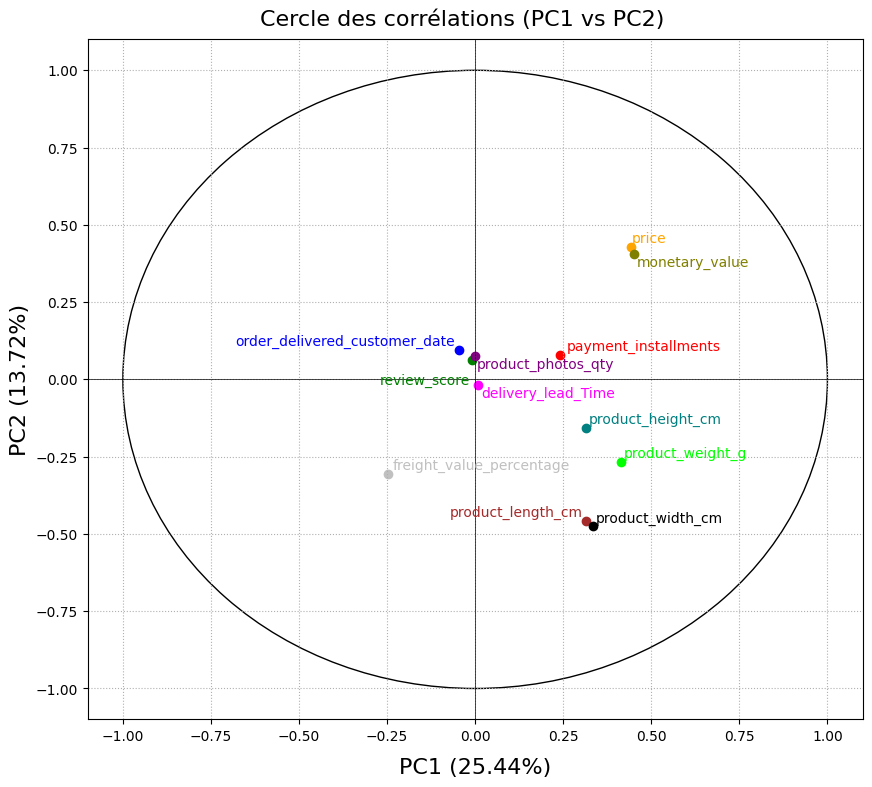

,PC1,PC2
order_delivered_customer_date,-0.045417,0.096055
review_score,-0.008674,0.061464
payment_installments,0.239779,0.080229
price,0.442178,0.429601
product_photos_qty,0.000911,0.075066
product_length_cm,0.314261,-0.458808
product_height_cm,0.315313,-0.156312
product_width_cm,0.333763,-0.475911
delivery_lead_Time,0.008931,-0.017232
product_weight_g,0.413115,-0.266574


In [11]:
# Créer le premier graphique (PC1 vs PC2)
plot_PCA(df, 1, 2)

On va ajouter les 9 colonnes

In [12]:
df_pca = ajouter_colonnes_PCA(df, nb_PCA=9)

In [13]:
df_features = df_pca.loc[:, ["PCA1", "PCA2", "PCA3", "PCA4", "PCA5", "PCA6", "PCA7", "PCA8", "PCA9"]]

In [14]:
results = cluster_analysis_k_means(df_features)
results = results.reset_index(drop=True)

In [15]:
results

,K,Silhouette,Davies-Bouldin,Silhouette Rank,Davies-Bouldin Rank,Rank Mean,Rank Final
0,2,0.586136,0.554385,1.0,3.0,2.0,1.0
1,5,0.525318,0.552714,3.0,2.0,2.5,2.0
2,3,0.538429,0.555483,2.0,4.0,3.0,3.0
3,8,0.501631,0.551190,5.0,1.0,3.0,3.0
4,4,0.524497,0.561748,4.0,5.0,4.5,5.0
5,7,0.500840,0.562591,6.0,6.0,6.0,6.0
6,6,0.496314,0.569345,7.0,8.0,7.5,7.0
7,9,0.494577,0.564625,8.0,7.0,7.5,7.0
8,10,0.488708,0.572466,9.0,9.0,9.0,9.0


In [16]:
k_means_pca = pd.DataFrame(results.iloc[0]).transpose()
k_means_pca.rename(index={0: 'k-means: features pca'}, inplace=True)
k_means_pca = k_means_pca.drop(['Silhouette Rank', 'Davies-Bouldin Rank', 'Rank Mean', 'Rank Final'], axis=1)
k_means_pca

,K,Silhouette,Davies-Bouldin
k-means: features pca,2.0,0.586136,0.554385


### 1# Utilisation des features R F M

- Silouhette: Score entre -1 et 1 (optimal = 1)
- Index de Davies Bouldin: Score entre 0 et ∞ (optimal = 0)

In [17]:
df_features = df.loc[:, ["customer_unique_id", "recency", "frequency", "monetary_value"]]

In [18]:
results = cluster_analysis_k_means(df_features)
results = results.reset_index(drop=True)

In [19]:
results

,K,Silhouette,Davies-Bouldin,Silhouette Rank,Davies-Bouldin Rank,Rank Mean,Rank Final
0,3,0.642075,0.491698,2.0,1.0,1.5,1.0
1,5,0.410105,0.636575,4.0,2.0,3.0,2.0
2,2,0.691078,0.692289,1.0,6.0,3.5,3.0
3,6,0.410294,0.657125,3.0,4.0,3.5,3.0
4,7,0.405270,0.653670,5.0,3.0,4.0,5.0
5,9,0.373690,0.688757,7.0,5.0,6.0,6.0
6,4,0.378432,0.700742,6.0,8.0,7.0,7.0
7,10,0.369838,0.695708,8.0,7.0,7.5,8.0
8,8,0.359404,0.706705,9.0,9.0,9.0,9.0


In [20]:
k_means_rfm = pd.DataFrame(results.iloc[0]).transpose()
k_means_rfm.rename(index={0: 'k-means: feature rfm'}, inplace=True)
k_means_rfm = k_means_rfm.drop(['Silhouette Rank', 'Davies-Bouldin Rank', 'Rank Mean', 'Rank Final'], axis=1)
k_means_rfm

,K,Silhouette,Davies-Bouldin
k-means: feature rfm,3.0,0.642075,0.491698


### 2# Ajout feature "review_score"

In [21]:
df_features = df.loc[:, ["customer_unique_id", "recency", "frequency", "monetary_value", "review_score"]]

In [22]:
results = cluster_analysis_k_means(df_features)
results = results.reset_index(drop=True)

In [23]:
results

,K,Silhouette,Davies-Bouldin,Silhouette Rank,Davies-Bouldin Rank,Rank Mean,Rank Final
0,3,0.642066,0.491705,2.0,1.0,1.5,1.0
1,2,0.691070,0.692297,1.0,5.0,3.0,2.0
2,5,0.410076,0.636606,4.0,2.0,3.0,2.0
3,6,0.410260,0.657156,3.0,3.0,3.0,2.0
4,9,0.373834,0.688636,6.0,4.0,5.0,5.0
5,4,0.378407,0.700768,5.0,7.0,6.0,6.0
6,10,0.369777,0.695786,7.0,6.0,6.5,7.0
7,8,0.359233,0.706258,8.0,8.0,8.0,8.0
8,7,0.351729,0.708319,9.0,9.0,9.0,9.0


In [24]:
k_means_rfm_review = pd.DataFrame(results.iloc[0]).transpose()
k_means_rfm_review.rename(index={0: 'k-means: feature rfm + review_score'}, inplace=True)
k_means_rfm_review = k_means_rfm_review.drop(['Silhouette Rank', 'Davies-Bouldin Rank', 'Rank Mean', 'Rank Final'], axis=1)
k_means_rfm_review

,K,Silhouette,Davies-Bouldin
k-means: feature rfm + review_score,3.0,0.642066,0.491705


**Ajouter la feature review_score diminue la qualité du clustering**

### 3# Ajout feature "delivery_lead_Time"

In [25]:
df_features = df.loc[:, ["customer_unique_id", "recency", "frequency", "monetary_value", "review_score", "delivery_lead_Time"]]

In [26]:
results = cluster_analysis_k_means(df_features)
results = results.reset_index(drop=True)

In [27]:
display(results)

,K,Silhouette,Davies-Bouldin,Silhouette Rank,Davies-Bouldin Rank,Rank Mean,Rank Final
0,8,0.527303,0.508212,2.0,1.0,1.5,1.0
1,6,0.529379,0.539084,1.0,5.0,3.0,2.0
2,9,0.526194,0.518153,4.0,2.0,3.0,2.0
3,10,0.526333,0.521767,3.0,3.0,3.0,2.0
4,7,0.524231,0.528221,6.0,4.0,5.0,5.0
5,3,0.525477,0.613224,5.0,8.0,6.5,6.0
6,4,0.522841,0.575225,7.0,7.0,7.0,7.0
7,5,0.515227,0.554879,8.0,6.0,7.0,7.0
8,2,0.500483,0.697791,9.0,9.0,9.0,9.0


In [28]:
k_means_rfm_delivery = pd.DataFrame(results.iloc[0]).transpose()
k_means_rfm_delivery.rename(index={0: 'k-means: feature rfm + review_score + delivery_lead_Time'}, inplace=True)
k_means_rfm_delivery = k_means_rfm_delivery.drop(['Silhouette Rank', 'Davies-Bouldin Rank', 'Rank Mean', 'Rank Final'], axis=1)
k_means_rfm_delivery

,K,Silhouette,Davies-Bouldin
k-means: feature rfm + review_score + delivery_lead_Time,8.0,0.527303,0.508212


**Ajouter la feature delivery_lead_Time diminue la qualité du clustering**

### Comparaison

In [29]:
result = pd.concat([k_means_pca, k_means_rfm, k_means_rfm_review, k_means_rfm_delivery], axis=0)
result

,K,Silhouette,Davies-Bouldin
k-means: features pca,2.0,0.586136,0.554385
k-means: feature rfm,3.0,0.642075,0.491698
k-means: feature rfm + review_score,3.0,0.642066,0.491705
k-means: feature rfm + review_score + delivery_lead_Time,8.0,0.527303,0.508212


In [30]:
# Définir une fonction qui colore le meilleur score en vert.
def color_best_val_green(col):
    best_val = col.min() if col.name == 'Davies-Bouldin' else col.max()
    color = ['background-color: green' if v == best_val else '' for v in col]
    return color

# Appliquer la fonction seulement aux colonnes Silhouette et Davies-Bouldin
result.style.apply(color_best_val_green, subset=['Silhouette', 'Davies-Bouldin'])

,K,Silhouette,Davies-Bouldin
k-means: features pca,2.000000,0.586136,0.554385
k-means: feature rfm,3.000000,0.642075,0.491698
k-means: feature rfm + review_score,3.000000,0.642066,0.491705
k-means: feature rfm + review_score + delivery_lead_Time,8.000000,0.527303,0.508212


On va désormais prendre comme features ceux ci:
- recency
- frequency
- monetary_value
- review_score

## 2# Clustering DBSCAN

Silouhette: Score entre -1 et 1 (optimal = 1)  
Index de Davies Bouldin: Score entre 0 et ∞ (optimal = 0)

Ici on utilisera un sample au lieu d'utiliser tout le dataset, DBSCAN demande trop de ram pour 80000 clients

In [31]:
df_features = df.loc[:, ["customer_unique_id", "recency", "frequency", "monetary_value", "review_score"]]

In [32]:
results = cluster_analysis_DBSCAN(df_features)
results = results.reset_index(drop=True)

In [33]:
results

,K,Epsilon,MinPts,Silhouette,Davies-Bouldin,NoisePercent,Silhouette Rank,Davies-Bouldin Rank,Noise Rank,Rank Mean,Rank Final
0,3,2.311111,5,0.369000,1.523134,0.563645,6.0,7.0,4.0,5.666667,1.0
1,4,2.311111,4,0.370274,1.694575,0.328793,1.0,16.0,1.0,6.000000,2.0
2,4,2.311111,3,0.370274,1.694575,0.328793,1.0,16.0,1.0,6.000000,2.0
3,4,2.311111,2,0.370274,1.694575,0.328793,1.0,16.0,1.0,6.000000,2.0
4,3,2.311111,8,0.368622,1.612664,0.610615,7.0,11.0,5.0,7.666667,5.0
5,3,2.311111,7,0.368622,1.612664,0.610615,7.0,11.0,5.0,7.666667,5.0
6,3,2.311111,6,0.368622,1.612664,0.610615,7.0,11.0,5.0,7.666667,5.0
7,196,0.100000,2,-0.284067,1.476909,27.759512,10.0,5.0,10.0,8.333333,8.0
8,3,2.311111,10,0.370119,1.654270,0.704556,4.0,14.0,8.0,8.666667,9.0
9,3,2.311111,9,0.370119,1.654270,0.704556,4.0,14.0,8.0,8.666667,9.0


In [34]:
dbscan = pd.DataFrame(results.iloc[0]).transpose()
dbscan.rename(index={0: 'DBSCAN'}, inplace=True)
dbscan = dbscan.drop(['Silhouette Rank', 'Davies-Bouldin Rank', 'Rank Mean', 'Rank Final', 'Noise Rank'], axis=1)
dbscan

,K,Epsilon,MinPts,Silhouette,Davies-Bouldin,NoisePercent
DBSCAN,3.0,2.311111,5.0,0.369,1.523134,0.563645


## 3# Clustering de Ward

In [35]:
df_features = df.loc[:, ["customer_unique_id", "recency", "frequency", "monetary_value", "review_score"]]

In [36]:
results = cluster_analysis_ward(df_features)
results = results.reset_index(drop=True)

In [37]:
results

,K,Silhouette,Davies-Bouldin,Silhouette Rank,Davies-Bouldin Rank,Rank Mean,Rank Final
0,7,0.350938,0.682202,1.0,1.0,1.0,1.0
1,6,0.349298,0.799249,2.0,3.0,2.5,2.0
2,5,0.345784,0.952307,3.0,6.0,4.5,3.0
3,8,0.254953,0.793951,9.0,2.0,5.5,4.0
4,4,0.323277,1.245787,5.0,7.0,6.0,5.0
5,9,0.257513,0.856396,8.0,4.0,6.0,5.0
6,10,0.263261,0.882573,7.0,5.0,6.0,5.0
7,3,0.342725,1.353979,4.0,9.0,6.5,8.0
8,2,0.294515,1.295656,6.0,8.0,7.0,9.0


In [38]:
ward = pd.DataFrame(results.iloc[0]).transpose()
ward.rename(index={0: 'ward'}, inplace=True)
ward = ward.drop(['Silhouette Rank', 'Davies-Bouldin Rank', 'Rank Mean', 'Rank Final'], axis=1)
ward

,K,Silhouette,Davies-Bouldin
ward,7.0,0.350938,0.682202


## Comparaison

In [39]:
k_means_rfm.rename(index={'k-means: feature rfm': 'k-means'}, inplace=True)

In [40]:
k_means = k_means_rfm

In [41]:
k_means

,K,Silhouette,Davies-Bouldin
k-means,3.0,0.642075,0.491698


In [42]:
result = pd.concat([k_means, dbscan, ward], axis=0)
result

,K,Silhouette,Davies-Bouldin,Epsilon,MinPts,NoisePercent
k-means,3.0,0.642075,0.491698,NaN,NaN,NaN
DBSCAN,3.0,0.369000,1.523134,2.311111,5.0,0.563645
ward,7.0,0.350938,0.682202,NaN,NaN,NaN


In [43]:
# Réorganiser les colonnes
columns = result.columns.tolist()
columns.remove('Silhouette')
columns.remove('Davies-Bouldin')
columns.extend(['Silhouette', 'Davies-Bouldin'])
result = result.reindex(columns=columns)

# Définir une fonction qui colore le meilleur score en vert.
def color_best_val_green(col):
    best_val = col.min() if col.name == 'Davies-Bouldin' else col.max()
    color = ['background-color: green' if v == best_val else '' for v in col]
    return color

# Appliquer la fonction seulement aux colonnes Silhouette et Davies-Bouldin
result.style.apply(color_best_val_green, subset=['Silhouette', 'Davies-Bouldin'])

,K,Epsilon,MinPts,NoisePercent,Silhouette,Davies-Bouldin
k-means,3.000000,nan,nan,nan,0.642075,0.491698
DBSCAN,3.000000,2.311111,5.000000,0.563645,0.369000,1.523134
ward,7.000000,nan,nan,nan,0.350938,0.682202


**k-means est à privilégier**

## Analyse de nos clusters

In [44]:
df = df[["customer_unique_id", "recency", "frequency", "monetary_value", "review_score"]]

In [45]:
df

,customer_unique_id,recency,frequency,monetary_value,review_score
93,004288347e5e88a27ded2bb23747066c,228,2,354.37,5.000000
222,00a39521eb40f7012db50455bf083460,88,2,123.25,4.000000
273,00cc12a6d8b578b8ebd21ea4e2ae8b27,526,2,126.20,3.000000
364,011575986092c30523ecb71ff10cb473,133,2,214.90,3.500000
416,013ef03e0f3f408dd9bf555e4edcdc0a,41,2,245.37,5.000000
...,...,...,...,...,...
81787,fed519569d16e690df6f89cb99d4e682,164,2,286.14,5.000000
81851,ff03923ad1eb9e32304deb7f9b2a45c9,96,2,247.06,3.000000
82020,ff8892f7c26aa0446da53d01b18df463,276,2,330.14,3.500000
82034,ff922bdd6bafcdf99cb90d7f39cea5b3,350,3,139.60,4.333333


In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

def clustering_kmeans(df, nb_k):
    # Séparation des colonnes qualitatives et quantitatives
    colonnes_qualitatives = df.select_dtypes(include='object')
    colonnes_quantitatives = df.select_dtypes(exclude='object')

    # Normalisation des colonnes quantitatives
    scaler = StandardScaler()
    colonnes_quantitatives_normalisees = scaler.fit_transform(colonnes_quantitatives)

    # Clustering k-means
    kmeans = KMeans(n_clusters=nb_k, n_init = 10, random_state=42)
    clusters = kmeans.fit_predict(colonnes_quantitatives_normalisees)

    # Ajout des clusters au DataFrame d'origine
    df_cluster = df.copy()
    df_cluster['cluster'] = clusters

    # Réorganisation des colonnes pour placer 'cluster' en première position
    colonne_cluster = df_cluster.pop('cluster')
    df_cluster.insert(0, 'cluster', colonne_cluster)

    return df_cluster

In [47]:
df = clustering_kmeans(df, nb_k = 3)

In [48]:
df.head()

,cluster,customer_unique_id,recency,frequency,monetary_value,review_score
93,0,004288347e5e88a27ded2bb23747066c,228,2,354.37,5.0
222,0,00a39521eb40f7012db50455bf083460,88,2,123.25,4.0
273,2,00cc12a6d8b578b8ebd21ea4e2ae8b27,526,2,126.20,3.0
364,2,011575986092c30523ecb71ff10cb473,133,2,214.90,3.5
416,0,013ef03e0f3f408dd9bf555e4edcdc0a,41,2,245.37,5.0


In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

def plot(df, column_name, x_min=None, x_max=None, x_scale='linear', y_scale='linear'):
    plt.figure(figsize=(20,6))

    global_min = df[column_name].min() if x_min is None else x_min
    global_max = df[column_name].max() if x_max is None else x_max

    clusters = df['cluster'].unique()
    palette = sns.color_palette("hls", len(clusters))

    for i, cluster in enumerate(clusters):
        cluster_data = df[df['cluster']==cluster][column_name]
        if np.var(cluster_data) == 0:  
            plt.axvline(cluster_data.iloc[0], color=palette[i], linestyle='dashed')
            print(f"Cluster {cluster} has 0 variance; density estimation skipped.")
        else:
            sns.kdeplot(cluster_data, color=palette[i], fill=True)

    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))  
    plt.xscale(x_scale)
    plt.yscale(y_scale)
    plt.xlim(global_min, global_max)
    plt.legend(title='Clusters', labels=clusters)
    plt.title('Distribution de {} par Cluster'.format(column_name))
    plt.xlabel('{}'.format(column_name))
    plt.ylabel('Densité') 
    plt.show()

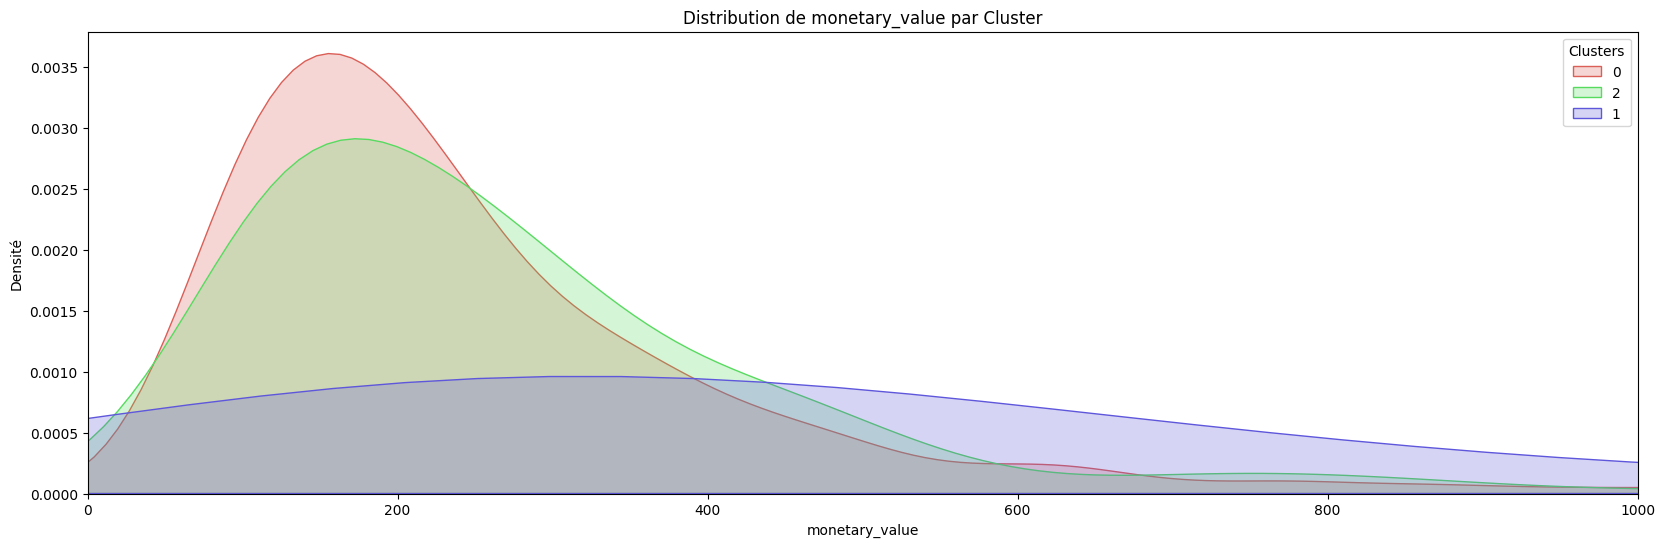

In [50]:
plot(df, "monetary_value", x_min=0, x_max=1000)

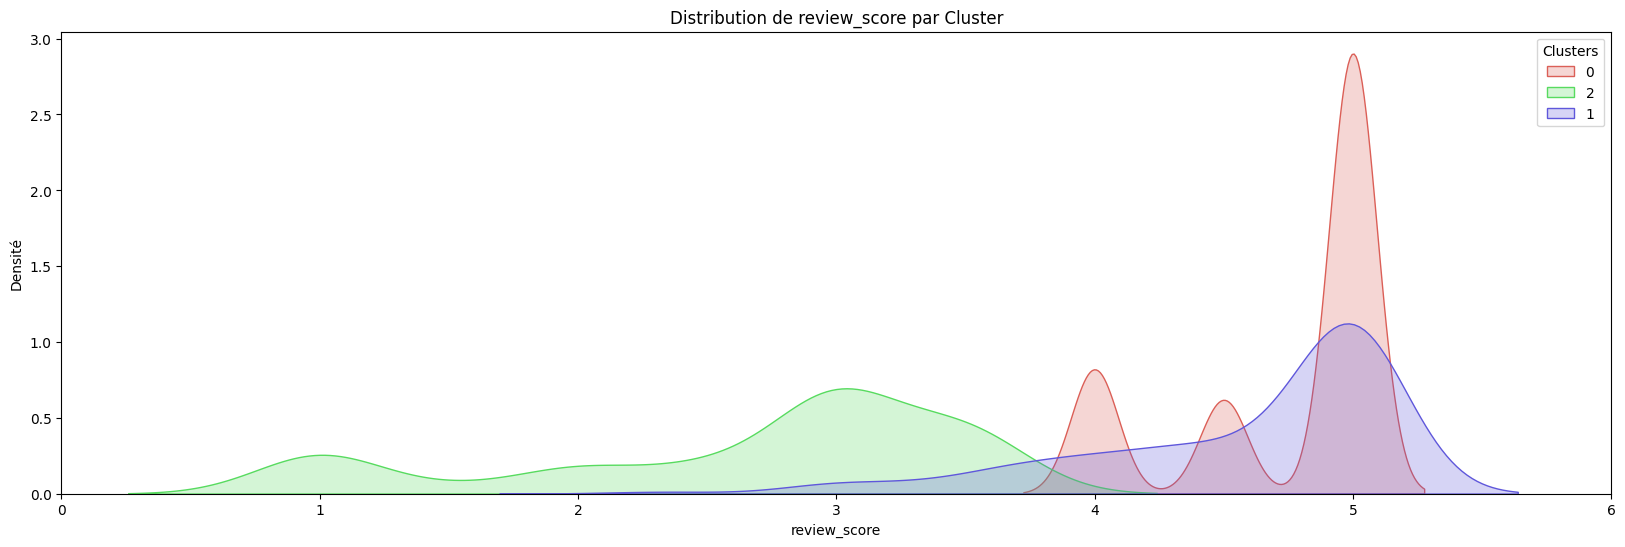

In [51]:
plot(df, "review_score", x_min=0, x_max=6)

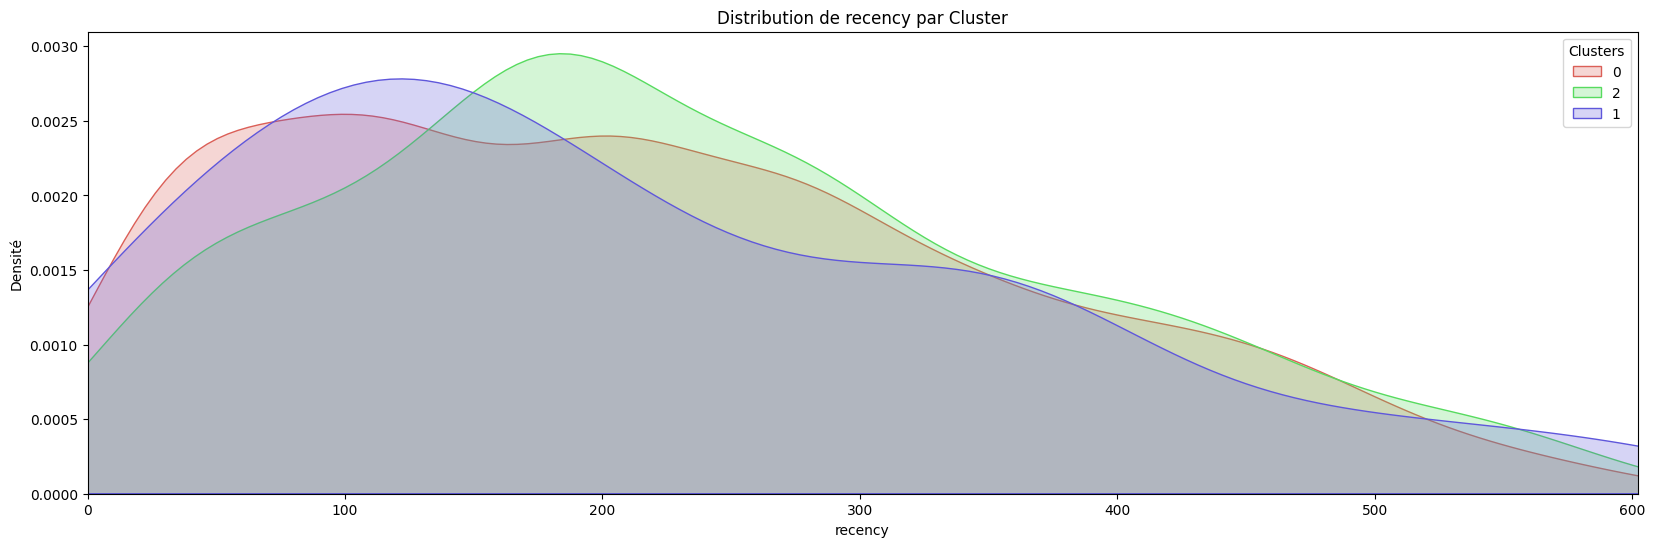

In [52]:
plot(df, "recency", x_min=0, x_max=None)

Cluster 0 has 0 variance; density estimation skipped.


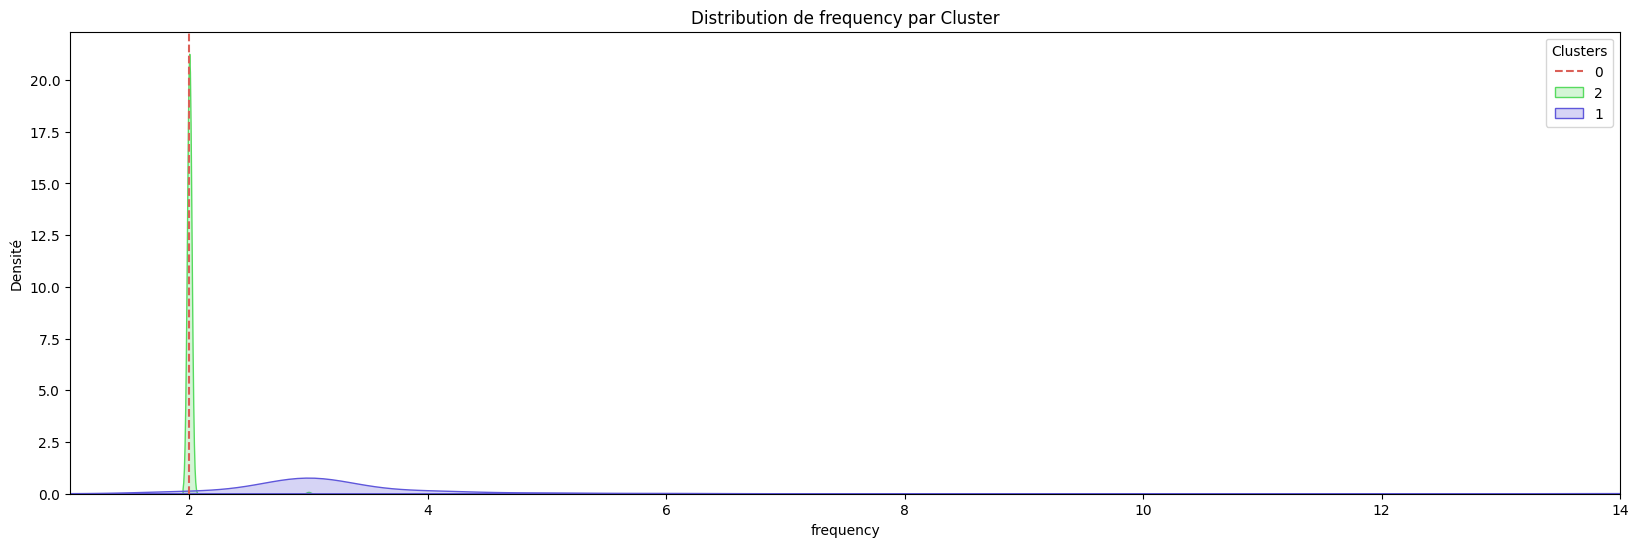

In [53]:
plot(df, "frequency", x_min=1, x_max=None, y_scale='linear')

In [54]:
df.to_csv('data_cluster_2_orders_or_more.csv', index=False)

In [55]:
df

,cluster,customer_unique_id,recency,frequency,monetary_value,review_score
93,0,004288347e5e88a27ded2bb23747066c,228,2,354.37,5.000000
222,0,00a39521eb40f7012db50455bf083460,88,2,123.25,4.000000
273,2,00cc12a6d8b578b8ebd21ea4e2ae8b27,526,2,126.20,3.000000
364,2,011575986092c30523ecb71ff10cb473,133,2,214.90,3.500000
416,0,013ef03e0f3f408dd9bf555e4edcdc0a,41,2,245.37,5.000000
...,...,...,...,...,...,...
81787,0,fed519569d16e690df6f89cb99d4e682,164,2,286.14,5.000000
81851,2,ff03923ad1eb9e32304deb7f9b2a45c9,96,2,247.06,3.000000
82020,2,ff8892f7c26aa0446da53d01b18df463,276,2,330.14,3.500000
82034,1,ff922bdd6bafcdf99cb90d7f39cea5b3,350,3,139.60,4.333333
